# Learning Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('preprocessing data.csv')
df.head()

,A,B,C,D,E,F,G,H
0,23.0,8000.0,1.1,23.0,555.0,Red,Yes,Male
1,32.0,5000.0,2.1,26.0,NaN,Blue,No,Male
2,NaN,6000.0,NaN,125.0,NaN,Black,Yes,NaN
3,54.0,70000.0,NaN,140.0,NaN,Red,NaN,NaN
4,64.0,6500.0,3.6,24.0,574.0,NaN,No,Male


In [ ]:
df

,A,B,C,D,E,F,G,H
0,23.0,8000.0,1.1,23.0,555.0,Red,Yes,Male
1,32.0,5000.0,2.1,26.0,NaN,Blue,No,Male
2,NaN,6000.0,NaN,125.0,NaN,Black,Yes,NaN
3,54.0,70000.0,NaN,140.0,NaN,Red,NaN,NaN
4,64.0,6500.0,3.6,24.0,574.0,NaN,No,Male
5,46.0,NaN,2.5,NaN,556.0,Red,NaN,Female
6,NaN,NaN,NaN,NaN,545.0,Blue,NaN,Male
7,53.0,4500.0,NaN,NaN,586.0,Red,Yes,NaN
8,NaN,NaN,4.2,26.0,NaN,Black,Yes,Male
9,24.0,3200.0,2.3,25.0,546.0,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

A    3
B    3
C    4
D    3
E    4
F    2
G    4
H    4
dtype: int64

## Handling Missing Value
## 1. Mean, Median, Mode Imputation

In [ ]:
m =df.A.mean() # finding the mean for the column 'A' and store it in m
print(m)

42.285714285714285


In [ ]:
#df.A.fillna(m)    #filling the missing values of column 'A' with mean value

In [ ]:
med = df.A.median() # finding the median of the column "A" and store it in mid
med

46.0

In [ ]:
df['A_Median'] = df['A'].fillna(df['A'].median()) ## creating a new column where missing values are filled with Median

In [ ]:
df

,A,B,C,D,E,F,G,H,A_Median
0,23.0,8000.0,1.1,23.0,555.0,Red,Yes,Male,23.0
1,32.0,5000.0,2.1,26.0,NaN,Blue,No,Male,32.0
2,NaN,6000.0,NaN,125.0,NaN,Black,Yes,NaN,46.0
3,54.0,70000.0,NaN,140.0,NaN,Red,NaN,NaN,54.0
4,64.0,6500.0,3.6,24.0,574.0,NaN,No,Male,64.0
5,46.0,NaN,2.5,NaN,556.0,Red,NaN,Female,46.0
6,NaN,NaN,NaN,NaN,545.0,Blue,NaN,Male,46.0
7,53.0,4500.0,NaN,NaN,586.0,Red,Yes,NaN,53.0
8,NaN,NaN,4.2,26.0,NaN,Black,Yes,Male,46.0
9,24.0,3200.0,2.3,25.0,546.0,NaN,NaN,NaN,24.0


In [ ]:
## So going forwards we will include colmn 'A_Median' to the ML algorithm not the column "A", it is just for our reference

## 2. Random Sample Imputation

In [ ]:
# Since the column 'A' is already filled with median values we will do Random Sampling on Column 'B'

In [ ]:
b = df.B.isnull().sum() # Checking the total no. missing value in column 'B' and storing in vaiable 'B'
b

3

In [ ]:
# We use sample function to select any 3(value of b) random values from the column 'B' after removing the null values
# and store it in a a variable name random_Sample and the result is nothing by a pandas series.
# random_state : reproduce the same result when you assign any integer to it
# When you donot mention random state, sample function will select any 3 (value of b) values from the column 'B'
# Hence to produce the same output we assign an interger to the random_state and it can be any integer, no specific
# to 0, we can use random_state=10, random_state=3 etc.
# Everytime you run the program the values choose by sample functions CHANGE
# This will generate diferent results everytime so avoid this we mention random_state to a fixed number
# so that every time we run the code, it produces the same result and this is called
# "Reproducibility of the Result"
# By using dropna , the null values will be drop from the column 'B' and sample function will only select 3 values
# from the existing values randomly.
random_Sample = df.B.dropna().sample(b, random_state =0)
print(random_Sample)
type(random_Sample)

9    3200.0
2    6000.0
1    5000.0
Name: B, dtype: float64


pandas.core.series.Series

In [ ]:
#Now after obtaining the 3 random values in the form of pandas series with their respective indexes as 9,2,1
# We are going to use the indexes of the null values to fill the the values of of random_Sample in the column 'B'
# For this, we will replace the indexes of the random_Sample pandas series with the indexs of the null values in
# the column 'B' and then using fillna function assign these value to their respective indexes.

# Replacing the random_Sample pandas series indexes with the null value indexes in column 'B'
random_Sample.index = df[df.B.isnull()].index

In [ ]:
random_Sample

5    3200.0
6    6000.0
8    5000.0
Name: B, dtype: float64

In [ ]:
df.B # printing df to check if the column 'B' still has NaN values

0     8000.0
1     5000.0
2     6000.0
3    70000.0
4     6500.0
5        NaN
6        NaN
7     4500.0
8        NaN
9     3200.0
Name: B, dtype: float64

In [ ]:
# Now replacing the null values with random_Sample pandas series using fillna function.
df.B.fillna(random_Sample, inplace =True)

In [ ]:
df.B # printing df to check if the process worked and NaN values are replaced with random_Sample

0     8000.0
1     5000.0
2     6000.0
3    70000.0
4     6500.0
5     3200.0
6     6000.0
7     4500.0
8     5000.0
9     3200.0
Name: B, dtype: float64

In [ ]:
## We would have filled them mean values however due to the repeatition of the same value it would have killed
## the fluctuation of the data set so we have avoid it by randomly selecting the values.
## Due to the complexity of the process, people are tend to neglect using Randaom Sample Imputation.

## 3. Captuing the (missingness) NaN with a New Feature :

In [ ]:
## In this method we are creating a new feature which will record the date in terms of 1 and 0.
## So for the NaN values enteries will be 1 and for non NaN values its will be 0.
## we use np.where() function to do that.
## isnull() basicalling checks if the value is NaN, if yes returns True else False
## np.where() takes 3 arguments,
## np.where(<condition>, <Result if condtion statisfies>, <Result if condition is False>)
## We will perform this on Column 'C'

In [ ]:
df.C.isnull().sum()## to check if the column C has null values

4

In [ ]:
## So column 'C' has 4 null values
## Now we will create a new feature/column with a name C_NaN where we fill the enteries using Capturing NaN
## techique by the use of np.where()

In [ ]:
df['C_NaN'] = np.where(df['C'].isnull(), 1 ,0)
##here condition is df['C'].isnull() , if the result is true 1 will be assigned to that entry else 0 will be assigned.

In [ ]:
df.head(5)

,A,B,C,D,E,F,G,H,A_Median,C_NaN
0,23.0,8000.0,1.1,23.0,555.0,Red,Yes,Male,23.0,0
1,32.0,5000.0,2.1,26.0,NaN,Blue,No,Male,32.0,0
2,NaN,6000.0,NaN,125.0,NaN,Black,Yes,NaN,46.0,1
3,54.0,70000.0,NaN,140.0,NaN,Red,NaN,NaN,54.0,1
4,64.0,6500.0,3.6,24.0,574.0,NaN,No,Male,64.0,0


In [ ]:
## here you can observe a new feature is added with 1 at NaN values and 0 at non_NaN values.
# Its upto us if we wants to keep both the feature in our model or just C_NaN, depending upon the requirement.
## The only nature of the new feature is to capturing the missingness of the data thats it.

## 4. End of Distribution

In [ ]:
## In this method, we fill the missing values with the extreme values
## To calculate the extreme values we have formula as :
## Extreme Right Value = Mean + 3 * Standard Deviation
## Extreme Left Value = Mean - 3 * Standard Deviation
## We will perform this method of Column 'D'
## Since date has all the the +ve values we will calculate the extreme right value and then fill NaN with that.

In [ ]:
df.D.isnull().sum() # To check if we have missig value in Column 'D'

3

In [ ]:
ext = df.D.mean() + 3 * df.D.std() # calculating the extremen right value
print(ext)

213.79459826718278


In [ ]:
df.D.fillna(ext, inplace = True) ## filling the NaN value with extreme value

In [ ]:
df.D ## check the result

0     23.000000
1     26.000000
2    125.000000
3    140.000000
4     24.000000
5    213.794598
6    213.794598
7    213.794598
8     26.000000
9     25.000000
Name: D, dtype: float64

In [ ]:
## So we can see that the values are filled with Extreme value.

## 5. Arbitrary Value Imputation

In [ ]:
## In this technique, we do our research and discussion with the client and based upon that we come to
## an Arbitrary Number, lets say 100. so We will pluge in that value in place of all the NaN value
## We will use Column 'E' for the same.

In [ ]:
df.E.isnull().sum() # Check if we have null values in the column E

4

In [ ]:
df.E.fillna(100, inplace =True) # Filling Null values by 100

In [ ]:
df.E # CHecking the result

0    555.0
1    100.0
2    100.0
3    100.0
4    574.0
5    556.0
6    545.0
7    586.0
8    100.0
9    546.0
Name: E, dtype: float64

## 6. Frequent Category Imputation (MODE)

In [ ]:
## So far we have seen the handling missing values for a Numerical/ Quantitative feature.
## Now we will see handling the missing values for Categotiacal feature which is column 'F'
## value_count() : its gives the frequecy of each category in a particular field in the a form of Pandas Series
## Q.Should we use values_count() for numerical data?
## Ans.No, it doesn't make any sense, should be used for categorical data. However if the situation demand you do
## then you may use it. But it will give a series with numerical values as a index and the no. of time that value
## repeats as the value to that index.

In [ ]:
## In this method, we fill the missing values or NaN but the mode that is the most popular category in a particular
## features or with the category which has the highest frequecy and used max. times

In [ ]:
df.F.isnull().sum() ## to check the null value in column 'F'

2

In [ ]:
df[df.F.isnull()].index ## check the index for which the value is null in column 'F'

Int64Index([4, 9], dtype='int64')

In [ ]:
df.F.value_counts() ## to check the frequecy of each category.

Red      4
Blue     2
Black    2
Name: F, dtype: int64

In [ ]:
## Clearly the Red has the highest frequecy and is most popular value and its a series so we can fetch the value
## index function

In [ ]:
mo = df.F.value_counts().index[0] # Obtain the Most popular category using index and indexing

In [ ]:
mo ## checking the result

'Red'

In [ ]:
df.F.fillna(mo, inplace = True) # Filling the missing Value

In [ ]:
df.F # Checking the Result.

0      Red
1     Blue
2    Black
3      Red
4      Red
5      Red
6     Blue
7      Red
8    Black
9      Red
Name: F, dtype: object

## 7. Treat NaN as New Category

In [ ]:
## This is a simple method where we replace all the NaN with a new category name 'Missing'
## It is used when the we wants to retaining the info that there was something missing
## we will use column 'G' for this

In [ ]:
df[df.G.isnull()]['G'] ## checking the missing values in column G

3    NaN
5    NaN
6    NaN
9    NaN
Name: G, dtype: object

In [ ]:
df.G.fillna('Missing', inplace = True) ## Filling the missing values with 'Missing' in column 'G'

In [ ]:
df.G # checking the result

0       Yes 
1         No
2       Yes 
3    Missing
4         No
5    Missing
6    Missing
7       Yes 
8       Yes 
9    Missing
Name: G, dtype: object

## 8. KNN Imputation

- K-Nearest Neighbors (KNN) Imputation is a technique used to handle missing data by predicting and filling in missing values based on the values of their nearest neighbors in the dataset. Instead of using simple mean, median, or mode imputation, KNN considers the similarity between observations.

How Does KNN Imputation Work?
Step1 : Finding Neighbors
- The algorithm calculates the distance (e.g., Euclidean distance) between data points based on available features.
It selects the k nearest neighbors (similar records) for the missing value.

Step2 : Imputing Missing Values
- For numerical data, it replaces the missing value with the mean (or median) of the corresponding values from the k-nearest neighbors.
- For categorical data, it can use the most frequent category among the neighbors.

Step3: Iterative Process
- The process is repeated for all missing values in the dataset, ensuring that the missing data is replaced in a way that maintains the overall structure and relationships in the dataset.


In [1]:
# To implement KNN Imputation we use the impute modeule of Sklearn library which has KNNImputer class.

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Sample dataset with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [2, np.nan, 3, 4, 5],
    'C': [np.nan, 1, 2, 3, 4]
}
df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

# Initialize KNNImputer with k=2
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the dataset
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nDataset after KNN Imputation:")
print(df_imputed)


Original Dataset:
     A    B    C
0  1.0  2.0  NaN
1  2.0  NaN  1.0
2  NaN  3.0  2.0
3  4.0  4.0  3.0
4  5.0  5.0  4.0

Dataset after KNN Imputation:
     A    B    C
0  1.0  2.0  1.5
1  2.0  2.5  1.0
2  1.5  3.0  2.0
3  4.0  4.0  3.0
4  5.0  5.0  4.0


## 9. Drop All the NaN Values

In [ ]:
## This method we use when the % of NaN value in a particular feature is more than 60%
## Then we prefer to drop that field
## we use del function or drop function to drop a particular field.

In [ ]:
df['H'] = (None ,1, None , None , None, None, None ,2,None ,None)## adding new feature to experiment

In [ ]:
df ## checking the result

,A,B,C,D,E,F,G,H,A_Median,C_NaN
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,NaN,23.0,0
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,1.0,32.0,0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,NaN,46.0,1
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,NaN,54.0,1
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,NaN,64.0,0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,NaN,46.0,0
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,NaN,46.0,1
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,2.0,53.0,1
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,NaN,46.0,0
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,NaN,24.0,0


In [ ]:
df.isnull().sum()/len(df) # checking the % of null value in Every field

A           0.3
B           0.0
C           0.4
D           0.0
E           0.0
F           0.0
G           0.0
H           0.8
A_Median    0.0
C_NaN       0.0
dtype: float64

In [ ]:
## clearly the column 'H' ha 80% of Null Values hence we decide to drop it.

In [ ]:
df.drop('H', axis =1 , inplace = True)

In [ ]:
df ## checking the result

,A,B,C,D,E,F,G,A_Median,C_NaN
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,23.0,0
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,32.0,0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,46.0,1
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,54.0,1
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,64.0,0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,46.0,0
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,46.0,1
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,53.0,1
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,46.0,0
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,24.0,0


## 10. Forward Fill and BackWard Fill

In [ ]:
## This method uses the bfill and ffill method to fill the missing values.
## It basicaly fills the missing value with the previous entry if ffill is used and
## fills the missing value with the forward entry if bfill is used.
## We wil create a new column name 'I' again to show how it works.

In [ ]:
df['I'] = (None ,1, None , None , 4, None, None ,2,None ,None) # Adding a new feature

In [ ]:
df # checking the result

,A,B,C,D,E,F,G,A_Median,C_NaN,I
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,23.0,0,NaN
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,32.0,0,1.0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,46.0,1,NaN
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,54.0,1,NaN
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,64.0,0,4.0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,46.0,0,NaN
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,46.0,1,NaN
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,53.0,1,2.0
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,46.0,0,NaN
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,24.0,0,NaN


In [ ]:
## bfill and ffill are part of fillna() with an argument name method
## both can be used sepearately or together
## let see how we use it seperately

In [ ]:
df.I.fillna(method='ffill', inplace = True) ## Using ffill seperately
df.I

0    NaN
1    1.0
2    1.0
3    1.0
4    4.0
5    4.0
6    4.0
7    2.0
8    2.0
9    2.0
Name: I, dtype: float64

In [ ]:
## First one is not filled as there is no value prior to that to do foward fill

In [ ]:
df.I.fillna(method='bfill', inplace = True) ## Using bfill seperately
df.I

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
5    4.0
6    4.0
7    2.0
8    2.0
9    2.0
Name: I, dtype: float64

In [ ]:
# Last two are not filled because there is no value after them to do backfill

In [ ]:
df.I.fillna(method='ffill').fillna(method='bfill',inplace = True ) ## Using ffill and bfill together will fill all NaN values.

In [ ]:
df.I

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
5    4.0
6    4.0
7    2.0
8    2.0
9    2.0
Name: I, dtype: float64

## Handling Outliers
## 1. IQR Method

In [ ]:
## This method is used when there is a skewness in the dataset.
## According the method , there is an Lower Quarlite Limit and Upper Quarltile limit, Any value which goes beyond
## that limit is an outlier.
## Formula to calculate the limits :
## Lower Limit : Q1 - 1.5 * IQR
## Upper Limit : Q3 + 1.5 * IQR
## Where IQR = Inner Quatile Range = Q3 - Q1
## for this lets import a tips dataset from seaborn library and work on it

tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
def iqr(data):
    Q1 = np.percentile(data,25, interpolation= 'midpoint')
    Q3 = np.percentile(data,75, interpolation= 'midpoint')
    IQR = Q3-Q1
    lo = Q1 - 1.5 * IQR
    uo = Q3 + 1.5 * IQR
    Outlier = []
    for i in data :
        if (i<lo) or (i>uo):
            Outlier.append(i)
    print('Outlier in the Dataset : ', Outlier)
iqr(tips_df['total_bill'])

Outlier in the Dataset :  [48.27, 44.3, 41.19, 48.17, 50.81, 45.35, 40.55, 43.11, 48.33]


In [ ]:
## Here we use the np.percentile() function to calculate the Q1, Q3, its takes multiple argument,
## However out interest is in only 3 i.e Data, percentile and interpolation = midpoint
## Percentile is something that divide the data into 100 equal parts, so since we need Q1 which is 25th percentile
## we will mention 25 as 2nd argument and lets suppose we have even no. of data and the python stuck between 2 no.
## then we have asked to take the midpoint,between the 2, so we decide interpolation = midpoint
## When we dicide Q1 and Q3 we want the exact middle value, so we generally use interpolcation to find the mid value.

## 2. Z Score Method

In [ ]:
## This method is used when the data is normally distributed.
## Z Score has a range between -3 to 3.
## Convert all the values into Z score.
## Magnitude of Z > 3, those are our outliers.


In [ ]:
def nor_Z(data):
    Out =[]
    mean = data.mean() ## mean = np.mean(data)
    std = data.std() ## std = np.std(data)
    for i in data :
        z = (i-mean)/std
        if z>3  or z<-3:
            Out.append(i)
    print('Outlier are :', Out)
nor_Z(tips_df.total_bill)

Outlier are : [48.27, 48.17, 50.81, 48.33]


In [ ]:
## So we calculate the Z score for each value and check if their value is greater than 3 and less then -3
## if yes then these are outliers.

In [ ]:
## Alternatively we can use scipy library to calculate Zscore and IQR

In [ ]:
from scipy import stats
o = []
tips_df['z_total_bill'] = stats.zscore(tips_df.total_bill)# creating a new feature with ZScore for column 'total_bill'
tips_df # checking the result

,total_bill,tip,sex,smoker,day,time,size,z_total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.040511
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.832275
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.324630
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.221287


In [ ]:
tips_df[(tips_df['z_total_bill']>3)|(tips_df['z_total_bill']<-3)].total_bill.values

array([48.27, 48.17, 50.81, 48.33])

In [ ]:
#### ALRERNATIVELY

In [ ]:
new_df = tips_df.drop(['tip','sex','smoker','day', 'time', 'size'], axis =1) ## create new_df from existing.

## new_df = tips_df[['total_bill','z_total_bill']].copy() >> will give the same result.

new_df.set_index('total_bill', inplace = True)## setting the total_bill as index
for i in new_df.itertuples(): ## iterating over the dataframe , checking the condition
    if i[1]>3 or i[1]<-3:
        o.append(i[0])
print(o)

[48.27, 48.17, 50.81, 48.33]


In [ ]:
stats.iqr(tips_df.total_bill)

10.779999999999998

In [ ]:
# Approaches to Handle Outliers

#a. Remove Outliers
# Applicable when outliers are data entry errors or irrelevant.

# b. Transform Data
# Log Transformation: Reduces the impact of large outliers.
# Box-Cox Transformation: Normalizes data including outliers.

# Eg : data['feature'] = np.log1p(data['feature'])

#c. Cap Outliers (Winsorization)
#Replace extreme values with threshold values
# (e.g., 𝑄1−1.5×IQR or 𝑄3+1.5×IQRQ3+1.5×IQR).
# upper_limit = Q3 + 1.5 * IQR
# lower_limit = Q1 - 1.5 * IQR
# data['feature'] = np.clip(data['feature'], lower_limit, upper_limit)

# numpy.clip() function is used to Clip (limit) the values in an array.

# Given an interval, values outside the interval are clipped to the interval edges.
# For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.)

# importing the numpy
import numpy as np

in_array = [1, 2, 3, 4, 5, 6, 7, 8 ]
print ("Input array : ", in_array)

out_array = np.clip(in_array, a_min = 2, a_max = 6)
print ("Output array : ", out_array)


Input array :  [1, 2, 3, 4, 5, 6, 7, 8]
Output array :  [2 2 3 4 5 6 6 6]


In [ ]:
# d. Replace Outliers
# Replace outliers with:
#  Mean or Median: Reduces distortion caused by extreme values.
#  Mode: Useful for categorical data.

# e. Robust Algorithms
# Use algorithms less sensitive to outliers:
#  Decision Trees
#  Random Forests
#  Gradient Boosting
#  Support Vector Machines (with appropriate kernels).

# f. Separate Treatment
# Treat outliers as a separate group:
# For instance, model them separately or use clustering techniques like DBSCAN.

# g. Use Robust Scaling
# Use robust scalers (e.g., median-based scaling) that are less affected by outliers.
# Example.
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# data['feature'] = scaler.fit_transform(data[['feature']])


## Feature Scaling

In [ ]:
df

,A,B,C,D,E,F,G,A_Median,C_NaN,I
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,23.0,0,1.0
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,32.0,0,1.0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,46.0,1,1.0
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,54.0,1,1.0
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,64.0,0,4.0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,46.0,0,4.0
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,46.0,1,4.0
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,53.0,1,2.0
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,46.0,0,2.0
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,24.0,0,2.0


## 1. Absolute Maximum Scaling

In [ ]:
## This techinique applies on numerical data
## In this technique we will divide the each element of a feature with the magnitude of the max value
## This makes all the entries in the range of -1 to 1.
## We will be using the library name sklearn which consist of all the ML model and scaler
## for preprocessing we will use , sklearn.preprocessing module which consists of all the scalers and other fucnts.
## for Absolute Maximum Scaling, we will be using. MaxAbsScaler()
## Along with that we will use the func, .fit_transform() or .fit() and. transsform() inside the MaxAbsScaler()
## Now .fit() : calculate the max absolute value of each column and store inside it
## .transform() :transform or apply the calculated value by .fit() on all of the columns
## Alternatively, both the setups can be achieve in one single step by .fit_transform() fuc
## Scaling down happens only with the combination of two.
## lets see how its works:

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler() ## assigning the method it a variable
col = ['A','B','C','D','E'] ## storing the name of all the Numerical column of df in variable col
mas.fit_transform(df[col]) ## applying MaxAbsScaler() to the df with .fir_ transform

## We can also use .fit and .transform
## mas.fit(df[col]) (calculates the value)
## mas.transform(df[col]) (apply the transforation on all the column)


array([[0.359375  , 0.11428571, 0.26190476, 0.10757989, 0.94709898],
       [0.5       , 0.07142857, 0.5       , 0.12161205, 0.17064846],
       [       nan, 0.08571429,        nan, 0.58467333, 0.17064846],
       [0.84375   , 1.        ,        nan, 0.65483413, 0.17064846],
       [1.        , 0.09285714, 0.85714286, 0.11225728, 0.97952218],
       [0.71875   , 0.04571429, 0.5952381 , 1.        , 0.94880546],
       [       nan, 0.08571429,        nan, 1.        , 0.93003413],
       [0.828125  , 0.06428571,        nan, 1.        , 1.        ],
       [       nan, 0.07142857, 1.        , 0.12161205, 0.17064846],
       [0.375     , 0.04571429, 0.54761905, 0.11693467, 0.93174061]])

## 2. Min -Max Sacler

In [ ]:
## This method use the formula for uniform distribution to scaling down the value
## Scaled Value = (x - Xmin)/(Xmax-Xmin)
## We will use MinMaxScaler() from Sklearn.preprocessing module to perform the operaton.
## It scaled down the data between 0 and 1

from sklearn.preprocessing import MinMaxScaler ## Importing the module
mms = MinMaxScaler() ## Assigning to a variable to perform different operations
data = [[-1,2],[-0.5,6],[0,10], [1,18]] ## New DataSet
mms.fit_transform(data) ## peforing the operation

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

## 3. Standardization

In [ ]:
## This is the most commonly used method for feature scaling.
## This method converts each value to the Z score
## Scaled Value = (X - Xmean)/ Xstd
## Values are between -3 and 3
## We will use StandardScaler( from sklearn.preprocessing module to perform the operation

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data = [[-1,2],[-0.5,6],[0,10], [1,18]] ## New DataSet
std.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

## Same Scaling Technique is Applied to All the Column in a data set.
## If we have outlier in the dataset, we go for standardization  and normalization
## if 20% of the feautres has outlier and 80% ~ Normal Distirbutution - Standardization or
## Normalization
## if there are too many features with outlier, then we use Robust Scaling
## 4. Normalization

In [ ]:
## This method aim to change the shape of the feauture
## Scaled Value = (X - Xmean)/(Xmax - Xmin)
## We will use normalize function from the sklearn.preprocessing module to perform the operation.

from sklearn.preprocessing import normalize
normalize(data)
## we donot need .fit_transform() in normalize scaler

array([[-0.4472136 ,  0.89442719],
       [-0.08304548,  0.99654576],
       [ 0.        ,  1.        ],
       [ 0.05547002,  0.99846035]])

## 5. Robust Scaling

In [ ]:
## When the data is highly skewed and more than 20% of the numerical featurs of the dataset have outliers
## then we use robust scaling. It used very rarely.
### Scaled Value  =(X - Xmedian) / IQR
## We will use RobustScaler from sklearn.preprocessing module to perform the operation

from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
data = [[-1,2],[-0.5,6],[0,10], [1,18]] ## New DataSet
rob.fit_transform(data)

array([[-0.85714286, -0.85714286],
       [-0.28571429, -0.28571429],
       [ 0.28571429,  0.28571429],
       [ 1.42857143,  1.42857143]])

## Encoding the Categorical variable

## 1. get_dummies()

In [ ]:
## It created a column for each class in a given feature and then 0 and 1 are asigned to the value which has
## that particular class in it
## That is excatly what the OneHotEncoding does.
## we will use .getdummies from pandas library and then pass the particular feature into it
df

,A,B,C,D,E,F,G,A_Median,C_NaN,I,Yes,No,Missing
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,23.0,0,1.0,1.0,0.0,0.0
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,32.0,0,1.0,0.0,1.0,0.0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,46.0,1,1.0,1.0,0.0,0.0
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,54.0,1,1.0,0.0,0.0,1.0
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,64.0,0,4.0,0.0,1.0,0.0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,46.0,0,4.0,0.0,0.0,1.0
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,46.0,1,4.0,0.0,0.0,1.0
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,53.0,1,2.0,1.0,0.0,0.0
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,46.0,0,2.0,1.0,0.0,0.0
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,24.0,0,2.0,0.0,0.0,1.0


In [ ]:
pd.get_dummies(df.F) ## Creats 3 new column for each class in the column 'F' and encode then on the basis of
                    ## value present on that index.

,Black,Blue,Red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,1,0,0
9,0,0,1


## 2. One Hot Encoding

In [ ]:
## This method also creates a sepearate column for each class in the feature.
## We will use OneHotEncoder from the sklearn.preprocessing module to perform the operation
## its involves certains steps
df

,A,B,C,D,E,F,G,A_Median,C_NaN,I
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,23.0,0,1.0
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,32.0,0,1.0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,46.0,1,1.0
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,54.0,1,1.0
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,64.0,0,4.0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,46.0,0,4.0
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,46.0,1,4.0
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,53.0,1,2.0
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,46.0,0,2.0
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,24.0,0,2.0


In [ ]:
## We will perform this on column 'G'
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

## Step 1: Storing the values of column G in an variable
g = df.G.values
g

array(['Yes ', 'No', 'Yes ', 'Missing', 'No', 'Missing', 'Missing',
       'Yes ', 'Yes ', 'Missing'], dtype=object)

In [ ]:
## Step 2: Reshape the array . We need to pass it as a column to the Encoder hence reshaping is required.
r_g = g.reshape(-1,1) # or r_g = g.reshape(10,1) , -1 is used for the last index
r_g

array([['Yes '],
       ['No'],
       ['Yes '],
       ['Missing'],
       ['No'],
       ['Missing'],
       ['Missing'],
       ['Yes '],
       ['Yes '],
       ['Missing']], dtype=object)

In [ ]:
## Step 3: Passing the reshaped value to the encoder
Output = ohe.fit_transform(r_g) ## This will give us a sparse matrix, to get the output we need to convert it
                                ## into array
Output

<10x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
## Step 4: Convert it in to array
F_Out = Output.toarray()
F_Out

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
## Step 5 : Identify which column of F_out belongs to which category('Red','Blue','Missing') by
            ## comparing it with column 'G'
print(df.G)
F_Out

0       Yes 
1         No
2       Yes 
3    Missing
4         No
5    Missing
6    Missing
7       Yes 
8       Yes 
9    Missing
Name: G, dtype: object


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
## So upon comparing it is observed that, column 1 = "Missing", Column2 = 'No', Column3 = 'Yes'

## Step 6: Adding these 3 new features to the dataset using indexing

df['Yes'] = F_Out[:,2]
df['No'] = F_Out[:,1]
df['Missing'] = F_Out[:,0]

In [ ]:
df ## Check the final output

,A,B,C,D,E,F,G,A_Median,C_NaN,I,Yes,No,Missing
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,23.0,0,1.0,1.0,0.0,0.0
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,32.0,0,1.0,0.0,1.0,0.0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,46.0,1,1.0,1.0,0.0,0.0
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,54.0,1,1.0,0.0,0.0,1.0
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,64.0,0,4.0,0.0,1.0,0.0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,46.0,0,4.0,0.0,0.0,1.0
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,46.0,1,4.0,0.0,0.0,1.0
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,53.0,1,2.0,1.0,0.0,0.0
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,46.0,0,2.0,1.0,0.0,0.0
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,24.0,0,2.0,0.0,0.0,1.0


In [ ]:
## All the 5 steps can be also be achieve in single line code i.e
Output = ohe.fit_transform(df.G.values.reshape(-1,1)).toarray()
Output

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
## and then we can follow step 6 to get the final output.

In [ ]:
## Alternatively use you can us .get_dummies() to get the same output.
new = pd.get_dummies(df.G)
new

,Missing,No,Yes
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
5,1,0,0
6,1,0,0
7,0,0,1
8,0,0,1
9,1,0,0


In [ ]:
pd.concat([df,new],axis = 1) ## Adding the values to the dataframe column wise

,A,B,C,D,E,F,G,A_Median,C_NaN,I,Yes,No,Missing,Missing,No,Yes
0,23.0,8000.0,1.1,23.000000,555.0,Red,Yes,23.0,0,1.0,1.0,0.0,0.0,0,0,1
1,32.0,5000.0,2.1,26.000000,100.0,Blue,No,32.0,0,1.0,0.0,1.0,0.0,0,1,0
2,NaN,6000.0,NaN,125.000000,100.0,Black,Yes,46.0,1,1.0,1.0,0.0,0.0,0,0,1
3,54.0,70000.0,NaN,140.000000,100.0,Red,Missing,54.0,1,1.0,0.0,0.0,1.0,1,0,0
4,64.0,6500.0,3.6,24.000000,574.0,Red,No,64.0,0,4.0,0.0,1.0,0.0,0,1,0
5,46.0,3200.0,2.5,213.794598,556.0,Red,Missing,46.0,0,4.0,0.0,0.0,1.0,1,0,0
6,NaN,6000.0,NaN,213.794598,545.0,Blue,Missing,46.0,1,4.0,0.0,0.0,1.0,1,0,0
7,53.0,4500.0,NaN,213.794598,586.0,Red,Yes,53.0,1,2.0,1.0,0.0,0.0,0,0,1
8,NaN,5000.0,4.2,26.000000,100.0,Black,Yes,46.0,0,2.0,1.0,0.0,0.0,0,0,1
9,24.0,3200.0,2.3,25.000000,546.0,Red,Missing,24.0,0,2.0,0.0,0.0,1.0,1,0,0


In [ ]:
## If there are 2 output column, then we can work with 2 columns and rest will can neglect.

## 3.Label Encoding

In [ ]:
## This encoder, encodes the values in a single column
## We use LabelEncoder from sklearn.preprocessing to perform this operation

df['K'] = ('Male', 'Female', 'Male' , None, 'Female' , 'Male', 'Female', 'Female', None, None)## adding new feature
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
a = Le.fit_transform(df.K)
df['K_LabelEnc'] = a
df[['K','K_LabelEnc']] ## checing the output

,K,K_LabelEnc
0,Male,1
1,Female,0
2,Male,1
3,None,2
4,Female,0
5,Male,1
6,Female,0
7,Female,0
8,None,2
9,None,2


# Linear Regression ML Model

In [ ]:
## Importing the basic libraries
## We will be understanding only the basis alogirithm of the linear regression, there are other form as well but
## we will be focusing on the basis working how does the linear regression Model works actually
## We will be using certain new libraries that will help us to perform the operations
## Numpy, Pandas, Matplotlib, Seasborn these are the libraries which we are well aware of.
## 1. statsmodels.api as sm : this is a library which DS doesn't use more often, DS goes with sklearn
## This library is basically designed for detailed analysis to be used by statisticians.
## Let say you create a regression model that is basically a statistical model,now there can be many different
## values that will be use by statistician to underline calculations so for that statsmodels is there.
## It can give you lots of out which are helpfuls from statistician point but we as DS cannot interpret what these
## terms actually mean.So its rarely used by the DS
## 2. sklearn.model_selection : This is the library that we are going to use and this is something
## we are going to practise or do handson.xsIt should be on your tips
## From this library , sklearn there are different class and all the models that we are going to learn, comes under
## this library.So undertand and practise thoroughly.
## lets get started....
## Fristly we will be importing all the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm ## to generate all the statistical models (linear regression)
from sklearn.model_selection import train_test_split ## to split the train and test data
from sklearn.linear_model import LinearRegression ## to import the linear regression model from linear_model class
from sklearn.metrics import r2_score , mean_squared_error ## to import r2 , MSR to check the efficiency of model or
                                                        ### to evaluate the model we will use these tool
## Suppress the Warnings :

import warnings
warnings.filterwarnings('ignore') # we do that to suppress the unnecessary warnings.

In [ ]:
## Preprocessing we are not using it that to keep it simple just for puporse of leaning how to create a model
## and how it works
## Anything related to sklearn, always check the documention on google and get more info about the library

In [ ]:
## We will be using a simplest dataset' Adveritising.csv'

In [ ]:
advertising = pd.read_csv('Advertising.csv')

In [ ]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
## Observation : X1 = TV, X2 = Radio , X3 = Newspaper, Y= Sales (Target Variable )
## X1, X2, X3 = Independent Variables
## Y = Target Variable

In [ ]:
### Peeking into Dataset :
advertising.shape

(200, 4)

In [ ]:
## It has 200 rows and 4 Columns, i.e 200 entries.

In [ ]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
## No Null Values

In [ ]:
advertising.describe() ## Only works on Numerical features

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
### This first step we are going to do is check the corelation of each column/feature w.r.t target variable(Sales)

# Step 1: Visualization :

In [ ]:
## For this we will be using pairplot from seaborm library

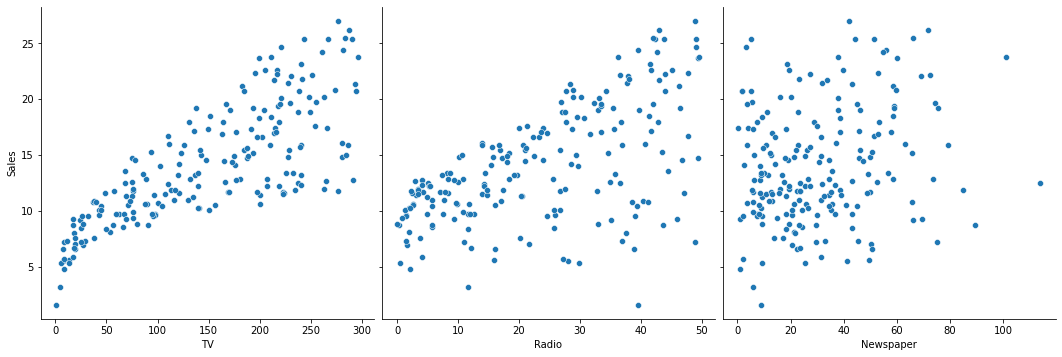

In [ ]:
sns.pairplot(advertising, x_vars=['TV','Radio', 'Newspaper'], y_vars='Sales', size=5, kind='scatter')

In [ ]:
### Observation, Analysis : TV has more linear relation with Target Variable than Radio and Newspaper

In [ ]:
#### Alternatively you can check with other plots also. However it will done individually

In [ ]:
 ## Lineplot

<AxesSubplot:xlabel='TV', ylabel='Sales'>

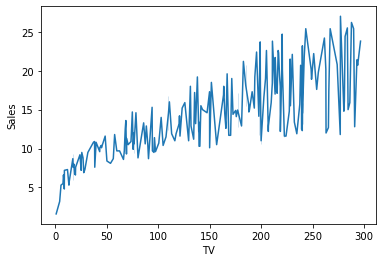

In [ ]:
sns.lineplot(x= 'TV', y = 'Sales', data = advertising) ## TV Vs Sales

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

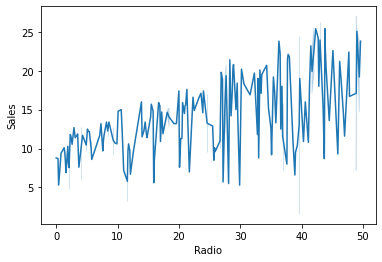

In [ ]:
sns.lineplot(x= 'Radio', y = 'Sales', data = advertising) ## Radio VS Sales

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

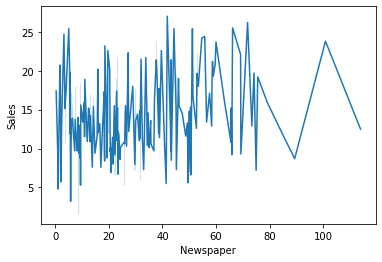

In [ ]:
sns.lineplot(x= 'Newspaper', y = 'Sales', data = advertising)###  For Newspaper VS Sale

In [ ]:
# Scatter PLot

<AxesSubplot:xlabel='TV', ylabel='Sales'>

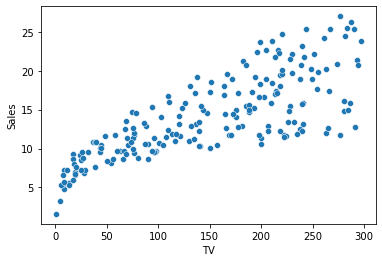

In [ ]:
sns.scatterplot(x= 'TV', y = 'Sales', data= advertising) ## TV Vs Sales

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

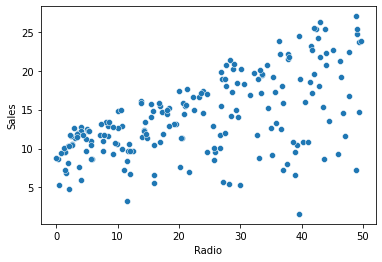

In [ ]:
sns.scatterplot(x= 'Radio', y = 'Sales', data= advertising) ## Radio Vs Sales

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

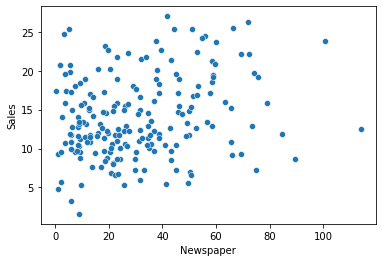

In [ ]:
sns.scatterplot(x= 'Newspaper', y = 'Sales', data= advertising) ## Newpaper Vs Sales

In [ ]:
## 3. lmplot

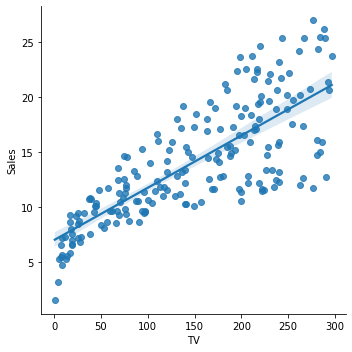

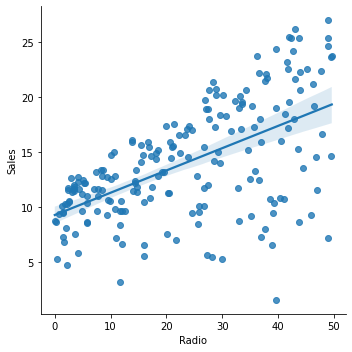

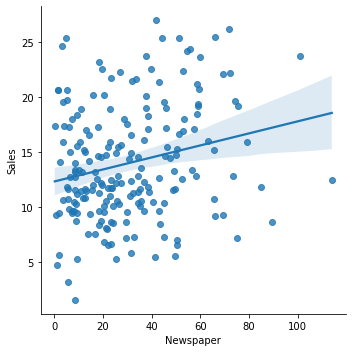

In [ ]:
sns.lmplot(x = 'TV', y= 'Sales', data = advertising)
sns.lmplot(x = 'Radio', y= 'Sales', data = advertising)
sns.lmplot(x = 'Newspaper', y= 'Sales', data = advertising)

In [ ]:
### Clearly from all the plots its observed that the TV has highly linear relation with Target Variable
## Then comes Radio and lastly which is least related to the Target Variable is Newspaper
## As per this observation , we can select TV and Radio to be a part of our model.
## However if you still feel that its not giving the relevent info then we can go to the next step i.e to
## observe Analysising Corelation with the help of heatmap

## 2. Analysing Corelation between featues and traget variable using Heat Map

<AxesSubplot:>

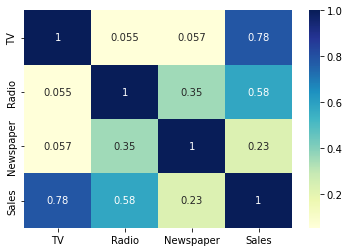

In [ ]:
## for this we willuse  heatmap from seaborn library
sns.heatmap(advertising.corr(), annot= True, cmap='YlGnBu') ## cmap = color map

In [ ]:
## from the last row we can see , sales has 0.78 corr with TV, 0.58 with Radio and 0.23 with Newspaper
## We can also check the MULTICOLLINEARITY, Radio and TV has 0.35, its is still managable, had it been that both TV
## and Radio has very good relation with Target Variable and they also are highly corelated with each other then
## it would has been a question whether to include with one of them or both of them in our model.
## These kinds of observation you can make using Heat Map

## Step 3. Defining the Independent and Dependent Variable in the Dataset

In [ ]:
## Presently we are working with only one independent Variable i.e 'TV'
## When the model is based on only one Independent Variable it is called Simple Linear Regresssion Model

In [ ]:
x = advertising.TV  ## Predictor Variable or Independent Variable
y = advertising.Sales ## Target Variable or Dependent Variable

In [ ]:
## It is our decision to decide how many feature we wants to select in model based upon the analysis we perform.
## We can also change the values, depending upon our requirement.

## Step 4: Analysing Multicollinearity

In [ ]:
## To check the Multicollinearity one way is via visuablization uing heatmap which we already did
## Second way is to calculate the VIF (Variance Inflation Factor), If the value if >5 then highly collinear else
## we can include the feature in model building.
## for this we will import the function name variance_inflation_factor from statsmodels.stats.outliers_influence
## formula is VIF = 1 / Tolerence or VIF = 1 / (1- R2)
## R2 = Rsquare, this is not model R2 to predict the efficient of model , this R2 is calcuated seperatedly for each
### predictor variable w.r.t other and then VIF is calcuated.

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_New = advertising[['TV', 'Radio', 'Newspaper']] ## Creating a new Dataframe with All Predictor Variables
Vif_df = pd.DataFrame() ## Creating an empty DataFrame to store the VIF values of each column
Vif_df['Feature'] = X_New.columns # Adding a new feature with the name 'Feature' in new data frame with entries as
                                 ## as coulmn name of X_New DataFrame
print(Vif_df) ## checking the result

## Calculating the VIF ::

Vif_df['VIF_Score'] = [variance_inflation_factor(X_New.values,i) for i in range(len(X_New.columns))]
             ## This is adding a new featue with VIF calculated values assigned to it.

## Syntax :
## variance_inflation_factor(Dataframe,  Index of the Coloumn for which you need to calculate the VIF
                                ## (which we want the target value to be))

## So basically variance_inflation_factor takes 2 argument, 1st is the data, 2nd is the Index of column for which we
## need to calculate the VIF
## So lets say I need the individual VIF for TV, We will write
## variance_inflation_factor(X_New,0)


Vif_df ## Checking the result

     Feature
0         TV
1      Radio
2  Newspaper


,Feature,VIF_Score
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [ ]:
### So it is observed that the none of the values are more then 5 hence no multicollinearity in dataframe.

In [ ]:
variance_inflation_factor(X_New,1)

3.285462100162896

In [ ]:
### Practically we donot use VIF often, people prefer heat map

## Step 5: Split the Data into Train and Test, (with Split Ratio : 70-30)

In [ ]:
## Here we are going to split the data into train and test, with 4 output, x_train, y_train, x_test, y_test
## for this we will be using sklearn.model_selection.train_test_split and we will assign the output to 4 new variables.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state = 5)

## here were are using test_size = 0.7, we can also use test_size =0.3, both will give the same result.
## random_state is used as we need fix selection, though the ratio will be 70-30 but everytime different enteries
## will be selected for train and test, and we donot want that so we use random state to fix the selection.

## Step 6. Reshaping the values of X_train and X_test

In [ ]:
## We need the output as coulmn wise so we will reshape them to feed them into the model, currently we are only using
## one predictor variable, howevrer practically we need to use more than one, she we need to make it column wire
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

## y is by default single column only!!
## X being the indpendent variable can have more than one column,so in order to convert it to a single column array
## we reshape it.

## Step 7: Initializing the LinearRegression() Model

In [ ]:
## Once your data is ready to be feed into the model we will instantiate out model like we did in all our scaler
## encoder.
## for that we will assign the func, LinearRegression() to a variable lm
lm = LinearRegression()  ## Initialising

## Step 8 :Fitting the Model and getting the parameters value:

In [ ]:
## We will use the .fit fuction for this which does the calculation part. In calculate it will observe the train
## dataset how does y_train fluctuates and using the OLS menthod only ,it will calculate the intercept and the
## coefficient.
## Intercept  = Constant Value
## Coefficient  = Slope Value
## the terms use here to obtain these values are .intercept_ which gives the constant and
## .coef_ willgives the slope
## this is one way to get the Model parameters
## ALTERNATIVELY, we use .get_params to get these values directly.

lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)

## lm.get_params

6.745302251222065
[0.05024351]


In [ ]:
## So right now we have just shown a training dataset to the model and asked it to give me a linear regression model.
## Once the linearRegression model is done, now comes the phase of evaluation
## So we have learned, model initialization is a 3 line code,
## 1.Initialise it,
## 2.fit it
## 3. get the parameters

## The Max time consuimg processing is before it and after creating it.

In [ ]:
### Now Evaluation of the model means to see the prediction of the test data when we feed X_test to the model.
## However we can also check, how the model works if we feed it to training data also, since that data is already
## feed to the model we can evaluate the model on the basis of training data also and this is very important
## that we do that and we expect out model to do a wonderfull job as it has been exposed to that data.
## further we can check the prediction for the unseen data for that we will keep the x_test and y_test aside.

## Step 9 : Finding the predicted values of Y on Xtrain and Xtest

In [ ]:
## To calculate the predicted value we will use the function lm.predict() and we will calcuate the y predicted for
## both train and test data and assign them to diff variable and then compare it with actual, y_test and y_train

y_train_pred = lm.predict(x_train)  ## calculate y predicted value for train data
y_test_pred = lm.predict(x_test) ## calculate y predicted value for train data

## it may perform good for training data and poor for test data, this is one scenario
## Another Scenario is what if my model does a bad job here only. Then we conclude, model is bad so we will undertand
## that the model is not performing good here so there is no point in moving further step which is testing.
## So that the reason it is very much imp that we need to understand how the model works in training phase and how
## does it works in testing phase.

## Step 10 : Calculating the Matrices of Training and Testing dataset.

In [ ]:
## Here we will check the accuracy of the model by calculating rsquare for training and testing data.
## for this we will be using r2_score function, we will take 2 arguments, 1st is the Actual value, 2nd is Predicted
## value,  r2_score(Actual Value , Predicted Value)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
r2_1 = r2_score(y_test, y_test_pred)

0.6411433688483876
0.5111616978794153


In [ ]:
## Observation : For the training dataset, Model is doing a decent job, we expected 80-85% however its giving 64.1%
## which is decent no.
## Note: rSquare value for training data is always be greater than test data as the model is already expose to the
## training data and test data is unseen for it.
## This is in general where we observe that the r2 for training should be greater than r2 for testing as the model
## is exposed to the training dataset and it is suppose to perform better. However in some cases, vica-versa happens
## that we will see in upcoming classes and but rigth now we are focusing on simple data setup only.

## Step 11 : Visualization of the result

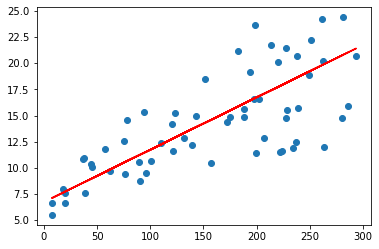

In [ ]:
### In this step we will visualize our result using scatter plot, to compare the result. i.e x_text Vs y_test_pred
## x_test Vs y_test and observe the result.
## Note : from the Step 8: where we fit the model, we have the model parameters slope or cofficent  = 0.050 and
## Contact or Intercept = 6.74, so from the equation. y = mX + C ; y_test_pred = 0.050 * x_test + 6.74
## or alternative we can use y_test_pred which we calcuated in step 9
# y_pred = m *X_test + C
# y_pred = 0.050 * X_test + 6.74
## So we will plot scatter plot for X_test and Y_test and line plot for x_test and y_test_pred

plt.scatter(x_test, y_test)
plt.plot(x_test, 0.050 * x_test + 6.74, 'r')
plt.show()

In [ ]:
# Observation : It is doing a decent job here.

## Multiple Linear Regression Model (wiht More than 1 predictor Variable)

In [ ]:
features = ['TV', 'Radio', 'Newspaper']
x_all = advertising[features]
y_all = advertising.Sales

In [ ]:
x_all_train, x_all_test, y_all_train, y_all_test = train_test_split(x_all, y_all, train_size= 0.7, random_state= 6)

In [ ]:
lr = LinearRegression()
lr.fit(x_all_train, y_all_train)
print(lr.coef_ , lr.intercept_)


[0.04629491 0.18350797 0.00364187] 2.9379108620031893


In [ ]:
y_all_train_pred = lr.predict(x_all_train)
y_all_test_pred = lr.predict(x_all_test)

In [ ]:
print(r2_score(y_all_train, y_all_train_pred))
print(r2_score(y_all_test , y_all_test_pred))

0.907242024188774
0.8598585513768164


In [ ]:
### Observation : Including all the feature makes the model work more efficiently rather than including one feature
### Now we will check the other parameters to evaluate the model performance
## Adj R2, Mean_Square_Error , Root Mean_square_Error

## 1. Adjusted Rsqaure ::

In [ ]:
### For Adjusted R2square we will create a function that returns the value of the Adj r2(rsquare)
## Adj r2 = 1-(1-r2)((n-1)/(n-k-1))
## n = no of samples/ rows in the dataset
## k = no of predictors/ features
## So we will create the func'n that takes n, k, r2 as the arugument and returns the Adj R2
def adj_rsquare(n,k,r):
    return 1 - ((1-r)*((n-1)/(n-k-1)))

In [ ]:
## Scenario 1 : Ajd r2 with One predictor Variable

In [ ]:
r1 = r2_score(y_test, y_test_pred) ## calculating the r2
print(r2)

0.8868821951328664


In [ ]:
n1 = x.shape[0] ## No of Row./Enteries in the dataset
k1 = 1 # as we have only one predictor variable i.e TV
Adj_r2_TV = adj_rsquare(n1,k1,r1)
print(Adj_r2_TV)

0.8863108930880829


In [ ]:
## Scenario 2: Ajd r2 with more than one predictor variable (including all the 3 columns)
r2 = r2_score(y_all_test, y_all_test_pred)
print(r2)

0.8598585513768164


In [ ]:
x_all.shape

(200, 3)

In [ ]:
n2 = x_all.shape[0] # No. of Rows/ Entries in the dataset
k2 = x_all.shape[1] # No. of predictor Variable = 3, as we choose all the columns here
Adj_r2_all = adj_rsquare(n2,k2,r2)
print(Adj_r2_all)

0.8577135292040126


In [ ]:
## Observation : Adj R2 gets slightly decrease after includung the columns, Radio and Newspaper.

## 2. Mean_Sqaure_Error

In [ ]:
## We will use the function mean_sqaure_error fro sklearn.metrics
## mean_square_error(y_true, y_predicted)

In [ ]:
## Scenario 1: With one predictor Variable (TV)
mse_1 = mean_squared_error(y_test,y_test_pred)
print(mse_1)

2.504406518845738


In [ ]:
## Scenario 2: With more than one predictor Variable  (taking all)
mse_all = mean_squared_error(y_all_test, y_all_test_pred)
print(mse_all)

2.9106113713179598


In [ ]:
## Observation : MSE increase when we increase the column

## 3. Root_Mean_Square_Error

In [ ]:
## RMSE can be calculated by taking a Sqaureroot of MSE

In [ ]:
## Scenario 1: With one predictor Variable (TV)
rmse_1 = np.sqrt(mse_1)
print(rmse_1)

1.582531680202876


In [ ]:
## Scenario 2: With more than one predictor Variable  (taking all)
rmse_all = np.sqrt(mse_all)
print(rmse_all)

1.7060513976190634


In [ ]:
#Obsevation : RMSE increase when we increase the predictor varible

In [ ]:
## Assignment ::
# Create a Linear Regaression Model for the following predictor Variable :
#  1. TV & Radio 2. TV & Newspaper 3. Radio & Newspaper

# Calculate the Evaluation Matrices for the each case (Rsquare, Adjusted R2 , MSE, RMSE) and share the observation

In [ ]:
#### LETS GET STARTED

In [ ]:
## Scenario 1:  TV & Radio as predictor Variables

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
x1 = advertising[['TV', 'Radio']]
y1 = advertising.Sales
x1.shape

x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,test_size=0.3, random_state=1)

lr1 = LinearRegression()
lr1.fit(x1_train,y1_train)
inter1 = lr1.intercept_
coef1 = lr1.coef_
print('Regression Parameters: ',inter1, coef1)

y1_test_pred = lr1.predict(x1_test)

## Rsquare ::
r_test_1 = r2_score(y1_test,y1_test_pred)
print('Rsquare: ',r_test_1)

## Adjsted R2
AdjR2_1 = adj_rsquare(x1.shape[0],x1.shape[1],r_test_1)
print('Adjusted Rsquare: ',AdjR2_1)

## MAE
mae1_test = mean_absolute_error(y1_test, y1_test_pred)
print('MAE: ',mae1_test)

## MSE
mse1_test = mean_squared_error(y1_test, y1_test_pred)
print('MSE: ',mse1_test)

## RMSE
rmse_1_test = np.sqrt(mse1_test)
print('RMSE: ',rmse_1_test)

Regression Parameters:  2.9647671191401574 [0.04697554 0.17765046]
Rsquare:  0.9230321850256801
Adjusted Rsquare:  0.922250785888885
MAE:  1.047638679186816
MSE:  1.9147050289721788
RMSE:  1.383728668840889


In [ ]:
## Scenario 2 :  TV & Newspaper as predictor Variables

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
x2 = advertising[['TV', 'Newspaper']]
y2 = advertising.Sales

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,train_size=0.7 ,random_state=2)

lr2 = LinearRegression()
lr2.fit(x2_train,y2_train)
inter2 = lr2.intercept_
coef2 = lr2.coef_
print('Regression Parameters :',inter2, coef2)

y2_test_pre = lr2.predict(x2_test)

## Rsquare
r_test_2 = r2_score(y2_test,y2_test_pre)
print('RSquare: ',r_test_2)

## Adjusted R2
AdjR2_2 = adj_rsquare(x2.shape[0],x2.shape[1],r_test_2)
print('Adjusted Rsqaure: ', AdjR2_2)

## MAE
mae2_test = mean_absolute_error(y2_test, y2_test_pre)
print('MAE :', mae2_test)

## MSE
mse2_test = mean_squared_error(y2_test, y2_test_pre)
print('MSE :',mse2_test)

## RMSE
rmse2_test = np.sqrt(mse2_test)
print('RMSE :',rmse2_test)


Regression Parameters : 5.319762989622703 [0.04971653 0.05160748]
RSquare:  0.45580900175306316
Adjusted Rsqaure:  0.45028422004497237
MAE : 2.7126256522329277
MSE : 13.83306156829635
RMSE : 3.7192823996432898


In [ ]:
### Scenario 3: Radio and Newspaper as predictor variables

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
x3 = advertising[['Radio', 'Newspaper']]
y3 = advertising.Sales

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, train_size=0.7, random_state=2)

lr3 = LinearRegression()
lr3.fit(x3_train, y3_train)
inter3 = lr3.intercept_
coef3 = lr3.coef_
print('Regression Parameters: ',inter3, coef3)

y3_test_pred = lr3.predict(x3_test)

## Rquare
r_test_3 = r2_score(y3_test,y3_test_pred)
print('Rsquare : ', r_test_3)

## Adjusted Rsquare
AdjR2_3 = adj_rsquare(x3.shape[0],x3.shape[1],r_test_3)
print('Adjusted RSquare: ',AdjR2_3)

## MAE
mae3_test = mean_absolute_error(y3_test, y3_test_pred)
print('MAE', mae3_test)

## MSE
mse3_test = mean_squared_error(y3_test, y3_test_pred)
print('MSE: ',mse3_test)

## RMSE
rmse3_test = np.sqrt(mse3_test)
print('RMSE: ',rmse3_test)

Regression Parameters:  8.60966797921528 [0.21929977 0.01582926]
Rsquare :  0.09489402431026728
Adjusted RSquare:  0.08570513115605671
MAE 3.5158834847385374
MSE:  23.007338834861898
RMSE:  4.796596588713908


# Logistic Regression Model

In [ ]:
### For the logistic regression model we will be using the dataset, Socail_Netwrok_Ads.csv
### Following libraries we will use
## Numpy, pandas, matplotlib.pyplot, seaborn , sklean.model_selection.train_test_split
## sklearn.linear_model.logistic regression
## sklearn.metrices ## to import all the evaluation parameters
## sklearn.preprocessing.StandardScaler >> for feature scaling
## warning.filerwarnings('ignore') >> to ignore the warnings

###  Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Always Scale down the variables when model is distance based

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Import the Dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset.info() ## To check for the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Observation :
# 5 Feature in the dataset
# No null Values in any feature
# User ID, Age, EstimatedSalary are Numerical Column
# Gender is a categorical column
# Age and EstimatedSalary are in different range
# UserID. is a unique value column and donot contribute the model at all like empid, its a non useful column.
# Purchased is a Target Variable, Already Encoded, 0-Not Purchased , 1 - Purchased
# Age, Gender, EstimatedSalary will contribute to the predictor Variable
# We will be using Age and EstimatedSalary as the predictor variable in this model
# You can including Genders as well depends upon you. We need to firstly endoce them to use with use of OneHot Encoding
# or Lable Encoding and then we can use them.

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Extracing the Variable

In [ ]:
## For logistic regression we will be requiring the values in the form of array, so we create the new dataset and
## the use .values to convert it into array format.
## We will do it with both predictor and traget variable.
## There are different way to create a new dataset, we have seen one way in linear regression.
## In logistic regression we will use the slicing and indexing to create a new data. however you are always
## welcome to follow old approach
## Lets see how
## First just a recap about the slicing and indexing in the dataset
## if we have a dataset name df, then df.iloc[:, :]
## First index before , is to select the row and 2nd index after , is for column
## so lets say I need to start from 0th row and need the data for 2nd and 3rd column
## df.iloc[:, 2:4]
## In out dataset too, we need Age and EstimatedSalary as predictor variable which are 3rd and 4th column and
## at index 2nd and 4rd and we need all the rows so we will leave row index before , as blank
## dataset.iloc[:,2:4] will give us the desired result

x = dataset.iloc[:, 2:4]
x  ## Checking the result

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
#Now we need this in the form of array so we will use .value
x = x.values
x ## checking the result

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
## Alternatively we can also so this in one step as
## x = dataset.iloc[:,2:4].values or x = dataset[['Age',EstimatedSalary]].values
## both will give us the same result
## Calculate Target variable in similar manner

In [ ]:
y = dataset.iloc[:,4].values ## or y = dataset['Purchased'].values
y ## Checking the result

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
## This is about extracting the variables, Now upon observing the predictor variable, we found that there is a huge
## difference between the range of Age and Estimated Salary so we need feature scaling for the same.

### HeatMap to see the correlation

<AxesSubplot:>

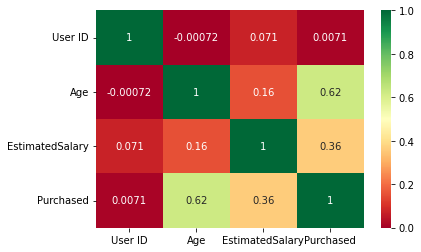

In [ ]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')

In [ ]:
### Observation : Target Variable has the good correlation with Age as compare to the other features.
### Age and Estimated Salary has week relation hence NO Multicollinearity
### EstimatedSalary share week relation with the target variable that means higher salary doesn't always means
## purchase will be high.

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state= 32)

### test_size , train_size, do takes fractional values, it not mandatory to always give decimal like we did in
### Linear Regression Model, we can also use fraction

### Feature Scaling

In [ ]:
## Now our dataset is split into test and train, we will perform the feature scaling on X_train and X_test as
## Y is already endoded.
## Now just a recap, to perform the featue scaling we use StandardScaler and then .fit and .transform funct.
## or we and use. .fit_transform to perform the operator combinely.
## However there is a catch here and it is very important to understand this
## We will perform the calcuation on train dataset and based on the same calculation done on train dataset
## we will transform this test data also.
## We do that becasue to perform the standard scaling if we calcuate the mean, median or std deviation differently
## on both train and test dataset then it will not scale them in same manner. that is why use the same calculation
## that is performed in the training dataset to transform the test data
## Lets see how

std = StandardScaler()
x_train = std.fit_transform(x_train) # fit generates the parameters and transform make changes to the data
x_test = std.transform(x_test) ## We use the same calculation in x_train to transform x_test

In [ ]:
## Now here the question arised that why can we preform the feature scaling before spliting the data?
## Answer to that is,
## The test data is suppose to be the foreingn data that we feed to the model to evvalute its preformance
## So if we apply feature scaling before the split then it will actually get the mean and the standard deviation
## of all the values, including the ones in the test set.
## Since the test set is something we are supposed to have like some future data in production,
## so applying feature scaling on the original data set, before the split would cause
## some information leakage on the test set. In that case we would grab some information from the test set
## that we are not supposed to get, because it is supposed to be new data with new observations.

##Therefore we come to the conclusion that : -

## "We should not apply feature scaling before the split , so that we are able to prevent information leakage
## on the test set, which we are not supposed to have until the training is done."

## Instantiating and Fitting the Model to training Dataset

In [ ]:
## Here we will assign the Logistic Regression to a variable and then train the model on training data using
## .fit function

log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)


## Note : We have not used the random state while instantiating the Linear Regression then why are we using it
## in LogisticRegression. Because it a classification problem where the target variable have more than one value
## in our dataset we have Purchase as 0 and 1. So lets say we run the model without random state and it assigned
## Purchased > 1 and Not Purchased >0 Now what is the assurity that the second time if we run the model it will
## do the same assignment, it could be Puchased >> 0 and Not Purchased >>1, in order to fix the assignement so that
## everytime we run the code the model will do the same assignment we use random_state.
## In all the classification problem we are going to use random_state as here the target variable is dealing with
## classed that has more than one output.

## Time Complexity is a concept that is the time taken by model to get trained on the training dataset.Currently
## We are dealing with a small dataset, generally datasets are quite large and model takes time to get trained on it
## and when the model involves lots of complex calculation then its takes consumes lot of time.
## Model having high time complexity are expensive in terms of productions.

LogisticRegression(random_state=0)

### Prediction for Test Dataset

In [ ]:

## Now in logisitic regression, outputs are based on the probabilites, so for each value of X_test, there are two
## probability values , lets say (0.3 , 0.75), which once is largers the model will select the value and predict the
## class of it, from the above eg, 0.75 is higher so the model will select this value and since its closer to 1
## the model will assisgn it to class '1'.
## Now, we can get both the output:
## .pridict() will give us the output in terms of classes
## .pridict_proba() will give us the probability values
## This happens in all type of Classification Model.
## We will see them both, first we will start with .predict()

y_pred = log_reg.predict(x_test)
y_pred # Predicted y test values



array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

In [ ]:
### Clearly the Output is in the form of Classes. Now lets compare this with y_test

In [ ]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0])

In [ ]:
## For understanding Purpose we , will find the difference = Residual and value_count(), will give the count of each
## class in the resultant dataset.

diff = pd.DataFrame(y_test - y_pred).value_counts()
diff

 0    114
 1     13
-1      7
dtype: int64

In [ ]:
## We can observe there are 3 classes : 0, 1, -1
## Considering 1 > Postive and 0 > Negetive
## diff : 0 - 0 = 0 = TN (TRUE NEGETIVE)
## diff : 1 - 1 = 0 = TP (TRUE POSITIVE)
## diff : 1 - 0 = 1  = FN (FALSE NEGETIVE)
## diff : 0 - 1 = -1 = FP (FALSE POSITIVE)
## TP + TN = 114 (0 Class has 114 entries)
## FN = 13 (1 Class has 13 entries)
## FP = 7 (-1 Class has 7 entries)

## Evaluation of Model

### Confusion Matrix

In [ ]:
## Confusion Matrix in python is  Actual been on Row Side and Predicted Been on Column Side and it gives us the
## Output in the same format every time i.e give below

                            ## Predicted
                           -ve          +ve
         ## Actual -ve     TN           FP
                   +ve     FN           TP    

In [ ]:
### we will use the confusion_matrix from metrics which we already imported from sklearn to see the output:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

array([[74,  7],
       [13, 40]])

In [ ]:
## Its confusing as it doesn't give any labels, so lets try to plot it in way in which it is more understandable

<AxesSubplot:>

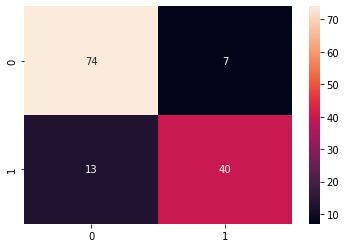

In [ ]:
## We will use the heatmap() and subplot()


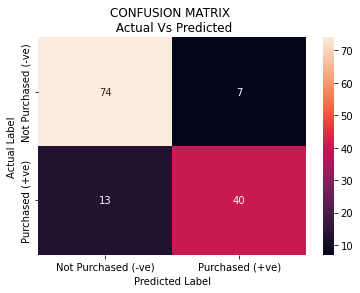

In [ ]:
sb = plt.subplot()
sns.heatmap(conf_mat, annot =True, ax= sb)
sb.set_xlabel('Predicted Label')
sb.set_ylabel('Actual Label')
sb.set_title('CONFUSION MATRIX \n Actual Vs Predicted')
sb.xaxis.set_ticklabels(['Not Purchased (-ve)', 'Purchased (+ve)'])
sb.yaxis.set_ticklabels(['Not Purchased (-ve)', 'Purchased (+ve)'])
plt.show()

In [ ]:
##From the Consufion Matrix :
## TP = 40 , TN = 74 , FP = 7 , FN = 13

### Accuracy

In [ ]:
## We will use the function, metices.accuracy_score() to calcaluate the same

print('Accuracy : ',metrics.accuracy_score(y_test, y_pred)*100,'%') ## (TP+TN)/Total > (74+40)/(74+40+7+13)

Accuracy :  85.07462686567165 %


### Precision

In [ ]:
## We will use the function, metices.precision_score() to calcaluate the same

print('Precision : ', metrics.precision_score(y_test,y_pred)) ## TP/ Total Predictions Positve > 40/(40+7)

Precision :  0.851063829787234


### Recall

In [ ]:
## We will use the function, metices.recall_score() to calcaluate the same

print('Recall : ', metrics.recall_score(y_test,y_pred)) ## TP/ Total Actual Positve > 40/(13+40)

Recall :  0.7547169811320755


In [ ]:
### Alternatively , we can get all the values of the evalution matrix using classification report tool
## sklearn.metrices.classification_report() gives us all the values

print('Classfication Report \n\n\n', metrics.classification_report(y_test, y_pred))

Classfication Report 


               precision    recall  f1-score   support

           0       0.85      0.91      0.88        81
           1       0.85      0.75      0.80        53

    accuracy                           0.85       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.85      0.85      0.85       134



In [ ]:
## It gives us values in terms of classes,  here 0 and 1 are the classes like precision for class '0' is 0.85
## and same for class '1' i.e 0.85 similarly the values of recall and f1-score
## It also gives the accuracy of the model, Here we have 0.85
## Support means no. of observations in each class.
## Here we have 81 observation(frequency) of class '0' and 53 observations(frequency) of class '1'
## It also gives macro avg , weighted ave
## Marco Avg is the Arithmetic Mean  : (v1+v2)/2
## It has given us the marco avg precision as 0.85 similarly for recall and f1-score
## Weighted Ave: It comes into the picture when the frequency of the classes is highly uneven.
## eg, No. of Observaiton(frequncy) of Class '0' > 120 , and No. of Observation(frequency) of class '1'> 14
## then we calculate the weighted ave as (f1*v1 + f2*v2)/(f1+f2)  where
## f1, f2 >> Frequency fr the particular class,
## v1, v2 >> Value of the parameter.
## Eg, Weighted Ave of precision >> (81 * 0.85 + 53 * 0.85)/(81 + 53) = 0.85
## Similary for recall and F1-score

## ROC and AUC

In [ ]:
## Before going to the ROC, lets talk about the model output, we have discuss it earlier, we have 2 outputs
## in logistic regresson or classification model, One is the final output, which is in terms of classes,
## in our case Class '0' and Class '1'.
## Second output can get is raw values of probabilites on the basis of which final decision is made.
## So far we have done the model evaluation using final output i.e in terms of class.
## ROC and AUC works on probablities values
## To get the probabilites values , we us , .predict_proba() function.
## let's see

y_pred_proba = log_reg.predict_proba(x_test)
y_pred_proba  ## checking the output

array([[0.01016366, 0.98983634],
       [0.97013083, 0.02986917],
       [0.93360052, 0.06639948],
       [0.06840191, 0.93159809],
       [0.04854055, 0.95145945],
       [0.6769741 , 0.3230259 ],
       [0.95829933, 0.04170067],
       [0.13195169, 0.86804831],
       [0.11859357, 0.88140643],
       [0.96067008, 0.03932992],
       [0.65779746, 0.34220254],
       [0.99146972, 0.00853028],
       [0.08630966, 0.91369034],
       [0.99382655, 0.00617345],
       [0.99217162, 0.00782838],
       [0.71100361, 0.28899639],
       [0.97604078, 0.02395922],
       [0.34882082, 0.65117918],
       [0.99374865, 0.00625135],
       [0.02232072, 0.97767928],
       [0.35409727, 0.64590273],
       [0.97720436, 0.02279564],
       [0.03492051, 0.96507949],
       [0.11413448, 0.88586552],
       [0.57995133, 0.42004867],
       [0.46302971, 0.53697029],
       [0.9488691 , 0.0511309 ],
       [0.93281404, 0.06718596],
       [0.14437257, 0.85562743],
       [0.5075021 , 0.4924979 ],
       [0.

In [ ]:
## As you can observe, this give the probability value of both class for each entry in the dataset.
## Now whatever value is greater or closer to 0 or 1 will be assigned to the respective class.

In [ ]:
## Now we get the probability of 2 classes, but we are intreseted in the probability of sucess only
## so We slice it out and store it in a variable , 2nd column of y_pred_prob is the prob of success (class '1')

y_pred_proba_sucss = y_pred_proba[:,1]
y_pred_proba_sucss

array([0.98983634, 0.02986917, 0.06639948, 0.93159809, 0.95145945,
       0.3230259 , 0.04170067, 0.86804831, 0.88140643, 0.03932992,
       0.34220254, 0.00853028, 0.91369034, 0.00617345, 0.00782838,
       0.28899639, 0.02395922, 0.65117918, 0.00625135, 0.97767928,
       0.64590273, 0.02279564, 0.96507949, 0.88586552, 0.42004867,
       0.53697029, 0.0511309 , 0.06718596, 0.85562743, 0.4924979 ,
       0.93615299, 0.72821091, 0.00936481, 0.92640258, 0.30063534,
       0.38880193, 0.01139632, 0.95353122, 0.07196075, 0.03496494,
       0.46838922, 0.0592154 , 0.76472603, 0.00840121, 0.05671517,
       0.95306987, 0.97989803, 0.02012794, 0.56466815, 0.0287822 ,
       0.08559898, 0.53632607, 0.0241377 , 0.11659706, 0.13534547,
       0.00431979, 0.94403464, 0.00296072, 0.90400672, 0.2255508 ,
       0.00359007, 0.32469104, 0.0077297 , 0.86361224, 0.86240694,
       0.08401643, 0.49379306, 0.89165586, 0.0094826 , 0.73617399,
       0.18308504, 0.03539894, 0.86569523, 0.92743281, 0.67446

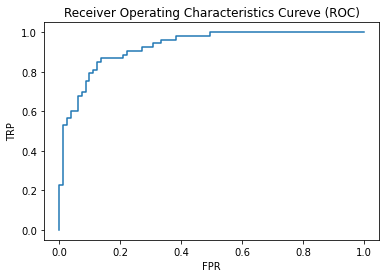

In [ ]:
## Now to Plot the ROC curve we will use metrices.roc_curve(), which will give 3 output, fpr, tpr , threshold

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_sucss) # (y_test, y_pred)

## Now if you see we have has the 2nd argument as y_pred_proba_sucss not y_pred, we can also pass y_pred it just
## y_pred_proba_sucss gives us more precise value for fpr and tpr and we can visualise the ROC more clearly.
## 0.75 , 0.95 both belongs to class '1' but if there is numerical difference which more precise value.
## threshold is something we donot focus only as our main ingrident for ROC curve are fpr and tpr so we will be
## focusing them only.
## now we have fpr and tpr, we gare going to plot it

plt.plot(fpr, tpr)
plt.title('Receiver Operating Characteristics Cureve (ROC)')
plt.xlabel('FPR')
plt.ylabel('TRP')
plt.savefig('ROC Curve')
plt.show()

In [ ]:
# Calculating AUC >> Area Under Cruve
## We will be using  metrices.roc_auc_score()

auc = metrics.roc_auc_score(y_test, y_pred_proba_sucss)
auc

0.9280223619846262

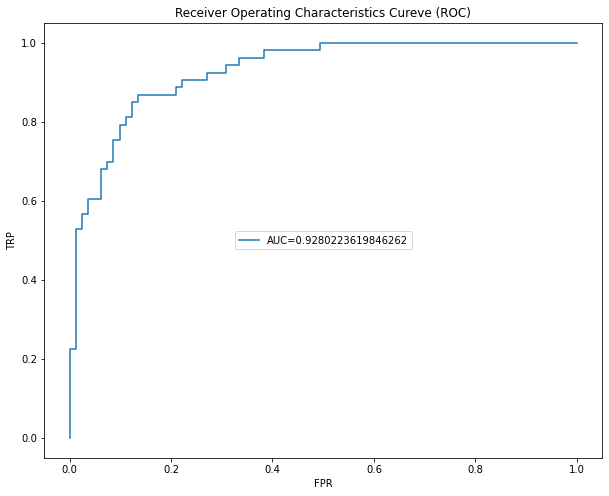

In [ ]:
## With the value of AUC which is closer to 1, tells that the model is doing a good job and producting more TPR
## than FPR.
## DS generally go wiht AUC calculation to evaluate the model and avoid going for ROC curve. Howver we have seen both
## Now if we want we can plot AUC in ROC curve too.

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr ,label = 'AUC='+ str(auc)) # Coverting auc value into  string and concatinate with 'AUC' as label
plt.title('Receiver Operating Characteristics Cureve (ROC)')
plt.legend(loc = 10)
plt.xlabel('FPR'
plt.ylabel('TRP')
plt.savefig('ROC Curve')

plt.show()


In [ ]:
# TPR  Vs FPR Vs Threshold

In [ ]:
df = pd.DataFrame()

In [ ]:
df['FPR'] = fpr
df['TPR'] = tpr
df['Threshold'] = thresholds
df

,FPR,TPR,Threshold
0,0.000000,0.000000,1.989836
1,0.000000,0.018868,0.989836
2,0.000000,0.226415,0.944035
3,0.012346,0.226415,0.936153
4,0.012346,0.528302,0.855627
5,0.024691,0.528302,0.808997
6,0.024691,0.566038,0.745923
7,0.037037,0.566038,0.736174
8,0.037037,0.603774,0.709710
9,0.061728,0.603774,0.674461


In [ ]:
##From the Consufion Matrix :
## TP = 40 , TN = 74 , FP = 7 , FN = 13

# FPR = FP /(Total Actual Negetive) = FP /(FP+TN)

Fpr = 7/(7+74)

# TPR = TP/(Toal Actual Positive) = TP/(TP+FN)

Tpr = 40/(40+13)

print(Fpr, Tpr)

0.08641975308641975 0.7547169811320755


In [ ]:
df.iloc[14:15 ,:]

,FPR,TPR,Threshold
14,0.08642,0.754717,0.523066


In [ ]:
## On camparing the Threshold correcponds to these value is 0.523066

# Decision Tree Model in Machine Learning

In [ ]:
## Now here we are going to use the same libraries which we have used so far i.e numpy, pandas, matplotlib.pyplot
## seaborn , sklearn.preprocessing , sklearn.model_selection.train_test_split ,
## sklearn.metrices.classification_report , sklearn.metrices.accuracy_score, sklearn.metrices.roc_curve , auc
## for decision tree there is new module we will use import it i.e
## sklearn.tree.DecisionTreeClassifier

## Lets begin

### Importing the libraries ::

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from  sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , roc_curve ,auc , classification_report

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [ ]:
### Dataset we are going to use is Bank.csv data set

In [ ]:
df = pd.read_csv('Bank.csv')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
## Observations :
## Banking Dataset with 17 different features and 11162 entries(rows)
## Most the features are categotical in Nature (Need Encoding)
## NO null values
## deposit will be target variable.

###  Data Preprocessing

In [ ]:
## We will be using the label encoder as that will be the easiest one to use
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
## Features on which we are going to perform the encoding will be
## job, marital , education, default , housing, loan , contact , month, poutcome , deposit

ref_df = df.copy()  ## We are creating a new dataframe which is the copy of our original df so that the orginal
lb = preprocessing.LabelEncoder() ## df stays there.

In [ ]:
ref_df.job = lb.fit_transform(ref_df.job)
ref_df.marital = lb.fit_transform(ref_df.marital)
ref_df.education = lb.fit_transform(ref_df.education)
ref_df.default = lb.fit_transform(ref_df.default)
ref_df.housing = lb.fit_transform(ref_df.housing)
ref_df.loan = lb.fit_transform(ref_df.loan)
ref_df.contact = lb.fit_transform(ref_df.contact)
ref_df.month = lb.fit_transform(ref_df.month)
ref_df.poutcome = lb.fit_transform(ref_df.poutcome)
ref_df.deposit = lb.fit_transform(ref_df.deposit)

In [ ]:
ref_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
#Now we get the our encoded data. next step is to slip the data

### Splitting the Data into test and train

In [ ]:
x = ref_df.drop('deposit',axis =1).values
y = ref_df.deposit.values

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=0.8 , random_state=5)

In [ ]:
x_train.shape

(8929, 16)

In [ ]:
x_test.shape

(2233, 16)

In [ ]:
## Now we will fit out model with train data, there are so many ways to fit the model in Decison tree.
## We will see some of them

## Decision Tree With CART(GINI)

###  Decision Tree with depth 4

In [ ]:
## Since its a classification model we will use the random_state , max_depth= 4,
## if we donot specify the max_depth, it will take it bydefault value i.e max fautes in the data set are 16

model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train,y_train)

y_pred_4 = model_dt_4.predict(x_test)
accuracy_score_4 = accuracy_score(y_test, y_pred_4)
print('Accuracy Score for the model with depth 4 is ',accuracy_score_4)

Accuracy Score for the model with depth 4 is  0.7913121361397224


###  Decision Tree with depth 6

In [ ]:
model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6)
model_dt_6.fit(x_train,y_train)

y_pred_6 = model_dt_6.predict(x_test)
accuracy_score_6 = accuracy_score(y_test, y_pred_6)
print('Accuracy Score for the model with depth 6 is ',accuracy_score_6)

Accuracy Score for the model with depth 6 is  0.8083296014330497


###  Decision Tree with depth 8

In [ ]:
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8)
model_dt_8.fit(x_train,y_train)

y_pred_8 = model_dt_8.predict(x_test)
accuracy_score_8 = accuracy_score(y_test, y_pred_8)
print('Accuracy Score for the model with depth 8 is ',accuracy_score_8)

Accuracy Score for the model with depth 8 is  0.8172861621137483


In [ ]:
## Observation :: So as the depth increases than the accracy also increases, so we question arises uptill when it goe
### We will learn to select the best fit for max depth later however let switch to different criteria 'Entropy'

## Decison Tree with C4.5 (Entropy)

In [ ]:
model_dt_ent = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=8)
model_dt_ent.fit(x_train,y_train)

y_pred_ent = model_dt_ent.predict(x_test)
accuracy_score_ent = accuracy_score(y_test, y_pred_ent)
print('Accuracy Score for the model with depth 8 using Entropy is', accuracy_score_ent)

Accuracy Score for the model with depth 8 using Entropy is 0.8119122257053292


In [ ]:
## Observation: Entropy Acc_Score with 8 depth is very close to GINI Acc_Score with 8 depth, however Gini is better.

In [ ]:
### So decision tree gives us lot of options to customize
## All of this will be coverered in random forest coz ramdom forest is the the expended version of DT
## Here we are working on just a basic variation to see how model actually works
## Detailed analysis will be done during Random Forest

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred_ent)) ## Entropy With Depth 8

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1170
           1       0.78      0.84      0.81      1063

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [ ]:
print(classification_report(y_test,y_pred_8)) ## Gini with Depth 8

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1170
           1       0.79      0.84      0.81      1063

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



In [ ]:
## As observed, the values are almost similar however the GINI still gives better result

## Area Under the Curve

In [ ]:
fpr_dt ,tpr_dt , _ = roc_curve(y_test, y_pred_8) # y_pred_proba

## Here we have directly used the value of y_pred instead earlier we have your the probability values
## This is done to show that we can use any of the valus, its its y_pred_proba will gives us more precise values

roc_auc_dt = auc(fpr_dt,tpr_dt)
print('Area under the curve is ',roc_auc_dt)

Area under the curve is  0.8182852111826712


### Graphical representation of Decision tree

In [ ]:
### Now to plot the Decision tree we will be using plot_tree() function from the sklearn.tree, along with that we
## will use subplots to make the decisison tree more clearly visible.
## so sklearn.tree.plot_tree(model, feature_names = , class_names = ,filled)
## model : name of model
## feature_name :  names of all the features in the model
## class_name : name of class in the target variable
## filled : default is False, When set to True, paint nodes to indicate majority class for classification,
## extremity of values for regression, or purity of node for multi-output.

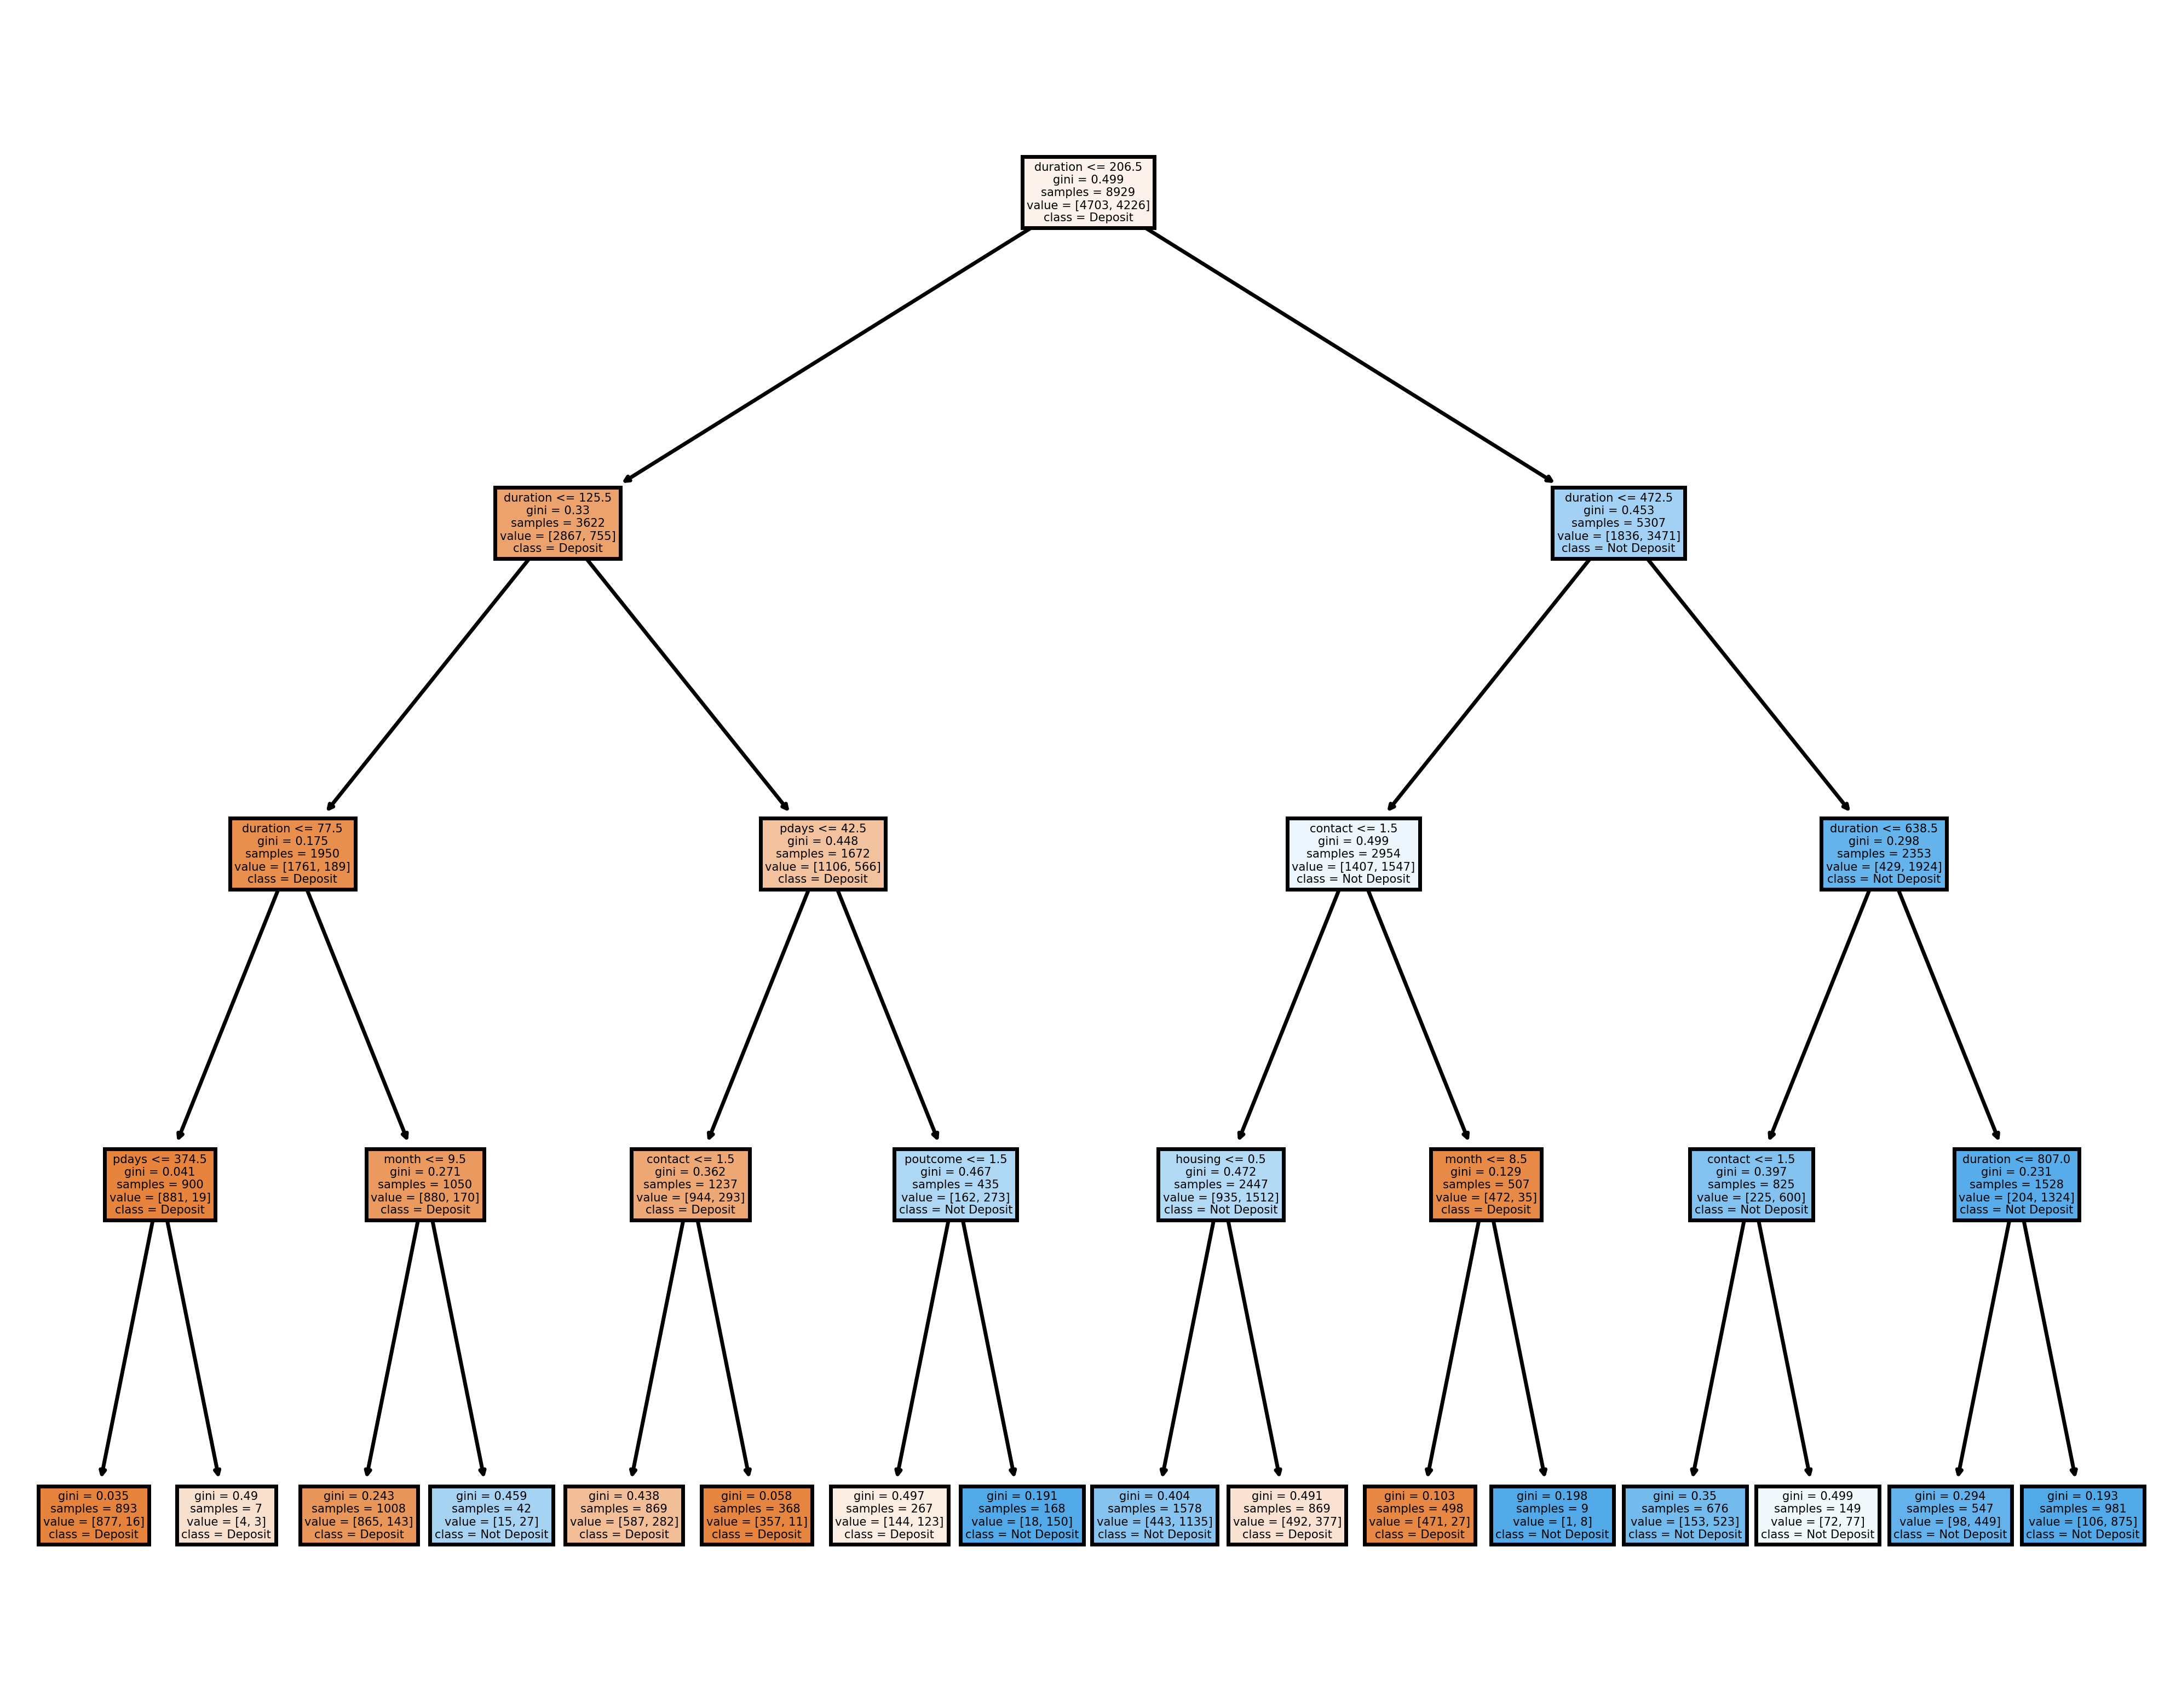

In [ ]:
from sklearn.tree import plot_tree

fn = df.drop('deposit', axis = 1).columns ## collecting the features name
cn = ['Deposit', 'Not Deposit'] ## class name in target variable

fig , axes = plt.subplots(1,1, dpi =500, figsize = (10,8)) ## to have fig and axes seperately
plot_tree(model_dt_4, feature_names=fn, class_names= cn , filled=True)
fig.savefig('Decision Tree with MaxDepth 4.jpg') ## To save the fig

## Random Forest ML Model

In [ ]:
## For Random forest we will be using sklearn.esemble.RobertForestClassifier
## sklearn.model_selection GridSearchCV for hypertuning and keeping the basis libararies same

### Importing the dependancies

In [ ]:
#Importing the basic module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve , auc, classification_report , accuracy_score , plot_confusion_matrix

## to plot the confusion matrix we will be using new function plot_confusion_matrix from sklearn.metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Importing the dataset
## We will be using the dataset, healthcare_data.csv

In [ ]:
cancer = pd.read_csv('healthcare_data.csv')
pd.set_option('display.max_columns',500)

In [ ]:
## To set the no. of rows, no. of columns, column width to display we use the function pd.set_option()
## pd.set_option('display.max_columns',500) set the no. of column to display is 500
## pd.set_option('display.max_rows',500) set the no. of rows to display as 500
## pd.set_option('display.max_colwidth',100) set the column width to 100

## To review the default value of no.of columns, no.of rows to display, column width we use
## pd.get_option('display.max_columns')
## pd.get_option('display.max_rows')
## pd.get_option('display.max_colwidth')


In [ ]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Analysis ::
1. Diagnosis tells about the type of cancer as B or M ('Benign', 'Malignant')
2. Type of cancer is based on the rest of the variables hence "Diagnosis" is the output variable (y)
3. Encoding of Diagnosis variable needs to be done
4. All other variables are in numerical form, hence no encoding is needed.
5. Since it is a Random Forest model, feature scaling is NOT necessary here. It is not distance based model.
6. The last column Unnamed is completely empty so it can be removed.
7. Along with the last column, we can also remove the first id column as it has no relation with target variable.


In [ ]:
col = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

## Removing the column 'id' and 'Unnamed' from the dataset.
## classes = ['Benign','Malignant']

In [ ]:
cancer.shape

(569, 33)

In [ ]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Encoding of Output/Target Variable

In [ ]:
## We are not using any encoder else we are using .map() function to map the classes according to our convinience
## as with encoder us need to find the class with the encoded value so its better to encode them by your own
cancer.diagnosis = cancer.diagnosis.map({'B':0, 'M':1})

In [ ]:
cancer.head(2) ## checking the result

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


### Removing the column

In [ ]:
cancer.drop(['id','Unnamed: 32'], axis =1, inplace=True)
cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Splitting the data

In [ ]:
feature_space = cancer.iloc[:,cancer.columns!='diagnosis']
feature_class = cancer.iloc[: , cancer.columns == 'diagnosis']

## we can also uses it  as the previous ways.
### feature_space = cancer.drop['diagnosis', axis =1]
### feature_class = cancer.diagnosis

x_train,x_test,y_train,y_test = train_test_split(feature_space,feature_class, train_size=0.8, random_state =42)

In [ ]:
feature_space

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Intializing the Random Forest Classifier

In [ ]:
fit_rf = RandomForestClassifier(random_state=5)

### Hypertuning of the parameters :

In [ ]:
### For Hypertuning we are going to  create a dictionary which consist of all the possible value of different
## Parameter which you want to check and then we pass this to GridSearchCV()

## Providing the different values to the hyperparameter

param_dist = {'max_depth' : [2,4,8],
             'max_features' : ['auto', 'sqrt', 'log2', None],
             'bootstrap':[True, False],
             'criterion':['gini', 'entropy']}

## bootstapping - Selecting the small dataset from the main dataset.That means that we are telling the model to
## take the entire dataset or do Random Sampling With Replacement. By default the value is True , boostrap = True

## Only few of the parameters are used here to show how hypertuning works coz generally this process takes time.

## After the dictonary is created the next step is to instantiate GridSearchCV() to find the best possible combination

## GridSearchCV(Model_name ,cv = ,  param_grid =  , n_jobs=, verbose = True)
## First argument will always be model on which we want to perform the operation(fir_rf in our case)
## cv = , means how many times we want to validate the parameters lets say cv=10, means the each combination will
## 10 iterations.
## then param_grid =. is the grid of parameterand their respective values which we want to apply
## and test,(dictionary that we created)
## n_jobs = no of jobs that we want model to perform simultanously. n_jobs =3 means model will perform 3 jobs at
## a time to execute the code early.
## verbose = True : its optional, it gives us the status of how the steps is proceeding.

cv_rf = GridSearchCV(fit_rf , cv =10, param_grid= param_dist, n_jobs=3, verbose= True)

## cv_rf is GridSearch object /model object that has been created and we will use this object to train our model
cv_rf

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=True)

In [ ]:
## Now this GridSearch object will do all the iterations on training dataset.

cv_rf.fit(x_train,y_train)

## These are 3 steps we have to follow in hypertuning. It is going to take sometime.

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=True)

In [ ]:
## 'Fitting 10 folds for each of 48 candidates, totalling 480 fits' : This particular info is shared by the verbose
## if we set it to False then it will not give this info or if we donot give verbose.
## it is not mandatory to give verbose it is upto our convinience.

In [ ]:
## This is the mostly crucial step that will take most time.
## This cv_rf has been trained on the our training dataset and we will use this object to predict the
## output of x_tes
## If we want tocheck the best parameters then we will use cv_rf.best_params_ to get the best combination

print('Best Parameters Using Gring Search : \n', cv_rf.best_params_)

Best Parameters Using Gring Search : 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


In [ ]:
## Now once we know the best parameters then we can instantiate our model accordingly.
## like above we have initailize the model fit_rf = RandomForestClassifier() without any aruguments
## Now we can initialise it using best params as fillted arguments

In [ ]:
fit_rf = RandomForestClassifier(bootstrap =  True,
                                criterion = 'entropy',
                                max_depth = 8,
                                max_features = 'log2')

## Upon Re-running the code the it is found that the parameters are changed earlier, criterion was 'entropy' now it is 'gini' it is because we haven't define the random_state any where in the model. This is the importance of random_state in classification model. It can be given at the time of initializing the model.

In [ ]:
## So while initializing the model if we add random_state then the it will generate the same output.
## Now since the hyperparameters are changed then we will update then using set_paras

In [ ]:
fit_rf.set_params(bootstrap =  True,
                                criterion = 'gini',
                                max_depth = 8,
                                max_features = 'log2')

RandomForestClassifier(max_depth=8, max_features='log2', random_state=5)

In [ ]:
## to check the parameters we will use .get_params
fit_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=8, max_features='log2', random_state=5)>

In [ ]:
## Here we can observe that criterion is not visible when we do fit_rf.get_params because it has a default value
## i.e 'gini'

In [ ]:
## Now we have got the the best parametrs, now we will fit the model and predict the y_test

In [ ]:
fit_rf.fit(x_train, y_train)
y_pred = fit_rf.predict(x_test)

### PLOTTING THE CONFUSIONN MATRIX

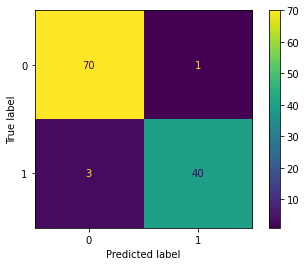

In [ ]:
## We will use plot_confusion_matix(model_object, x_test , y_test)

## alternatively we can plot confuson matrix as
## cm = confusion_matirx


plot_confusion_matrix(fit_rf,x_test,y_test,)



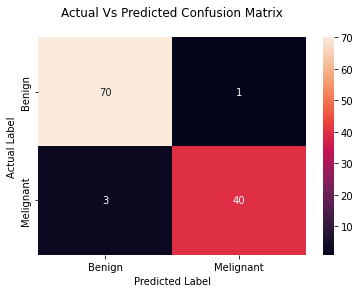

In [ ]:
### ALTERNATIVELY

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Actual Vs Predicted Confusion Matrix\n')
ax.set_xticklabels(['Benign', 'Melignant']) # ax.xaxis.set_ticklabels(['Benign', 'Melignant'])
ax.set_yticklabels(['Benign', 'Melignant']) # ax.yaxis.set_ticklabels(['Benign', 'Melignant'])
plt.show()

In [ ]:
#Observation from Confusion Matric :
# Actual Benign : 71 , correctly predicted = 70
# Actual Melignant : 43 , correctly predicted = 40

# That meants model is doing a good job.

## ACCURACY ::

In [ ]:
acc_rd = accuracy_score(y_test, y_pred)
print('Accuracy of Rondom Forest Model : ',acc_rd)

Accuracy of Rondom Forest Model :  0.9649122807017544


In [ ]:
# Accuracy is high 96.91%

### AREA UNDER THE CURVE

In [ ]:
pred_prob = fit_rf.predict_proba(x_test)[:, 1] ## we only need the class '1' i.e second column

fpr, tpr, _ = roc_curve(y_test, pred_prob)
print('Area Under the curve for Random Forest : ',auc(fpr,tpr))

Area Under the curve for Random Forest :  0.9941041598427776


In [ ]:
# AUC is also high : 0.9941

In [ ]:
## We can predict , Precision , recall , f1score with different model

## To check how cross validation works internally

In [ ]:
## for this we will use cross_val_score from sklearn.model_selection

## cross_val_score(Classifier(Model Object), x(predictor varaibles), y(target variable), cv=)
## its take model_object or estimator, x , v and cv = as argument, cv=None , which means 5 default cross validation
## and this result in an array of accuracy scores for different cross validations. if we give cv=10 , the it will
## return array of 10 accuracy scores.

from sklearn.model_selection import cross_val_score

score = cross_val_score(fit_rf, x_train,y_train, cv=10)
score

array([0.94285714, 0.92857143, 0.92857143, 0.91428571, 0.92857143,
       0.94285714, 0.88571429, 0.92857143, 0.97142857, 0.95714286])

In [ ]:
## So upon observation, we have 10 iterations and the score is accuracy score of each iteration and it s fluctuating
## reason for that would be , everytime a different dataset is getting selected. So likewise if we do 20 splits
## then there will be 20 accuracy scores and at last the mean accuracy will be choosen.

In [ ]:
score.mean() ## This will be the final output that will be choosen.

0.9670048309178745

In [ ]:
## This is just the internal working of cross validation. Donot relate it to above scores

In [ ]:
## Now about the warnings these warnings can be avoided  if we know the reason for the warnings.
## So the waring says ::
## DataConversionWarning: A column-vector y was passed when a 1d array was expected.
## Please change the shape of y to (n_samples,), for example using ravel().

## This means that y_train needed to be reshape. so avoid the warning, before running cv_rf.fit(x_train, y_train)
## if we do y_train = np.array(y_train['diagnosis']), warnings should disappear

In [ ]:
y_train

,diagnosis
68,0
181,1
63,0
248,0
60,0
...,...
71,0
106,0
270,0
435,1


In [ ]:
y_train1 = np.array(y_train['diagnosis'])
y_train1

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
## With GridSearchCV() there are lot of other parameters that we can work with. With practise only we will absorb it.}

## K Nearest Neighbour with Cross Validation

#### We have been given a classified dataset of a company! They have hidden the features columns name but you have given the data and the target classes.
#### We'll try to create a model that directly predicts a class for a new data point based off the features

## Importing the libraries

In [ ]:
# we will import the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Getting the data

In [ ]:
df = pd.read_csv('Classified Data', index_col=0) # setting the first column as index

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [ ]:
## If we observe that this data is classified data that means client donot want us to know the meaning of the
## feautures name else this will disclose the compnay confidential info , this genrally happens in finance domain
## where data is classified. when this kind of scenario happens KNN model helps us to work efficiently. Thats means
## you have less understanding about the predictor variables.

## Standardlize the Variables

##### Because the KNN classifier predicts the class of a given test observations by identifying the observations that are nearset to it, the scale of the variable matters. Any variable that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN CLassifier, thank variables that are on a samller sclaer. hence feature scaling is required in KNN classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(df.drop('TARGET CLASS', axis =1))
type(scaled_feature)

numpy.ndarray

In [ ]:
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [ ]:
df_scl = pd.DataFrame(scaled_feature,columns=df.columns[:-1]) ## coverting scaled array back to df exclusing
df_scl                                                        ## the last column

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_scl ,df['TARGET CLASS'], train_size=0.7, random_state=4)

In [ ]:
## Observation::
## Ideally we are suppose to do feature scaling after the train test split  as we donot want the test data to infuence
## However here we have done the feature scaling prior. This is just to show you that it can also be done before
## train test split., the machine will not show us the error. We can try on our own to check what happens when
## when we do feature scaling after train test split and observe the result. May be for this samll dataset
## we will not be able to see much difference however for the larger dataset we can see the difference. it we have
## to keep this thing in mind that sacling will always be done after train test split practically as it would
## result in baised model prediction.
## We wil use the same mean and std dvt. value that has been calcualted by .fit for training data to scale the test
## data using .transform, we will not calcualte the mean and std ddevt seperately for test data.
## x_train = scaler.fit_transform(x_train)
## x_test = scaler.transform(x_test)

## Using KNN

In [ ]:
## Remeber that we are trying to come up with a model to predict whether someone belongs to TARGET CLASS or not
## so we will start with k=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Since the target variable are 0 and 1 , that means we are dealing with classes hence we will importclassifier.
## And since it a classification problem ww will use random_state while initialising the classifier.

knn = KNeighborsClassifier(n_neighbors=3) ## We will start with n_neighbours=3, this we have to give implicitly.
knn.fit(x_train,y_train)               ## if we dont give bu default it s 5, n_neighbours = 5 (by default)
y_pred = knn.predict(x_test)       ## KNeighborsClassifier donot support random_state

## Predictions and Evaluations

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix , classification_report , auc, roc_curve

print(confusion_matrix(y_test, y_pred))

[[135  10]
 [ 11 144]]


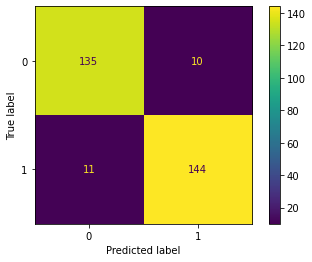

In [ ]:
print(plot_confusion_matrix(knn, x_test,y_test))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       145
           1       0.94      0.93      0.93       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
## Model is performing decent with neighbor of 3 but it can be improved.

## Now comes the main part of the model that to select the optimum value of the k so the model predicts more accurately.

## Choosing a K value

In [ ]:
## This will be achive by observing the model prediction for different values of k that is by using loop
## and accuracy score which will be calculated using cross_val_score(model_object, x, y, cv=)
## here we

accuracy_rate = [] # empty list

for i in range(1,41):

    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_scl, df['TARGET CLASS'], cv=10) # 10 accuracy score for each value of i, take
                                                                ## the mean of it.
    accuracy_rate.append(score.mean())

print(accuracy_rate)

[0.9109999999999999, 0.909, 0.9280000000000002, 0.9339999999999999, 0.9289999999999999, 0.929, 0.9310000000000003, 0.9340000000000002, 0.9289999999999999, 0.9350000000000002, 0.9329999999999998, 0.9350000000000002, 0.937, 0.9410000000000001, 0.9390000000000001, 0.9390000000000001, 0.9349999999999999, 0.9360000000000002, 0.9360000000000002, 0.9360000000000002, 0.9339999999999999, 0.9359999999999999, 0.93, 0.933, 0.9349999999999999, 0.937, 0.9380000000000001, 0.938, 0.937, 0.9390000000000001, 0.9360000000000002, 0.943, 0.937, 0.9390000000000001, 0.9390000000000001, 0.9400000000000001, 0.9369999999999999, 0.943, 0.9410000000000001, 0.942]


## We should use x_train and y_train to calculate the accuracy and error rate

In [ ]:
## Now sometimes people are not intrested in accuracy butin error_rate which can be obtain by substracting
## accuracy rate from 1
## Error_Rate = 1 - Accuracy_Rate
## code will be same to calculae the error rate. which us a minute different

error_rate = []

for i in range(41):

    knn = KNeighborsClassifier(n_neighbors=i)
    e_score = cross_val_score(knn, df_scl, df['TARGET CLASS'], cv=10)
    error_rate.append(1- e_score.mean())

print(error_rate)
len(error_rate)

[nan, 0.08900000000000008, 0.09099999999999997, 0.07199999999999984, 0.06600000000000006, 0.07100000000000006, 0.07099999999999995, 0.06899999999999973, 0.06599999999999984, 0.07100000000000006, 0.06499999999999984, 0.06700000000000017, 0.06499999999999984, 0.06299999999999994, 0.05899999999999994, 0.06099999999999994, 0.06099999999999994, 0.06500000000000006, 0.06399999999999983, 0.06399999999999983, 0.06399999999999983, 0.06600000000000006, 0.06400000000000006, 0.06999999999999995, 0.06699999999999995, 0.06500000000000006, 0.06299999999999994, 0.061999999999999944, 0.062000000000000055, 0.06299999999999994, 0.06099999999999994, 0.06399999999999983, 0.05700000000000005, 0.06299999999999994, 0.06099999999999994, 0.06099999999999994, 0.05999999999999994, 0.06300000000000006, 0.05700000000000005, 0.05899999999999994, 0.05800000000000005]


41

In [ ]:
## Now we will plot a graph between accuracy score and K values and observe the higher consistent values.

## Accuracy Rate Vs K value

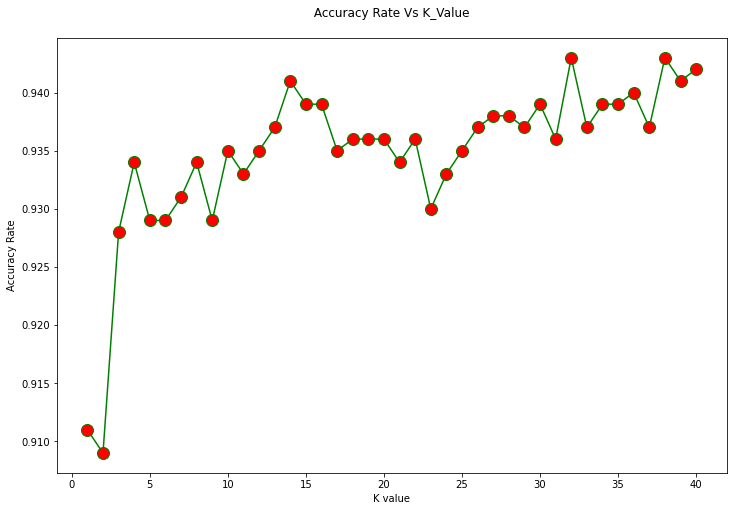

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,41),accuracy_rate, marker ='o',color = 'green', markersize = 12, markerfacecolor = 'red')
plt.xlabel('K value')
plt.ylabel('Accuracy Rate')
plt.title(' Accuracy Rate Vs K_Value \n')
plt.show()

In [ ]:
## We will always look for the higher consistent value not just the higher value. the value near to show be show
## similar accuracy score. from the obsevation we will see that for k =34,35,36 its consistent, for 18,19,20 shows
## the same kind of trend but their accuracy scopre is low. Like this we can predict the value for k which best fits.

In [ ]:
# Similarly we can plot Error rate vs Kvalues

## Error_Rate Vs K Value

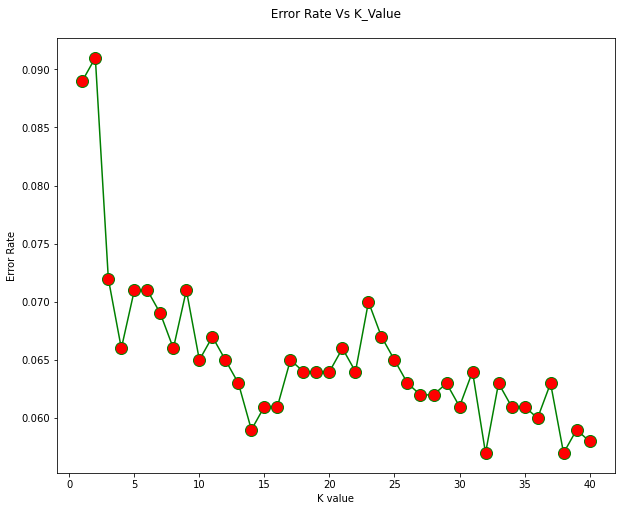

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(range(41), error_rate,  marker ='o',color = 'green', markersize = 12, markerfacecolor = 'red')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title(' Error Rate Vs K_Value \n')
plt.show()

### If we observe both the plot are excaply opposite to each other.
### for error  we will look low and consistent.
###  Here we can see that after k>20, the error rate just tends to hover around 0.06-0.05.Let's retain the model with that and check the classification report.

### Also in case of Accuracy, after around k>20,the accuracy is also amoust consistent.
### Our aim is get the best accuracy at lowest possible k value to avoid complaexity in the model due to comple calculation, so if we see similar kind of trend for the higher k values and with same accuracy rate, we will choose lower K value

In [ ]:
## FIRST A QUICK COMPARISION TO ORGINAL DATA K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
pred  = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n Classification Report\n\n')
print(classification_report(y_test, pred))

WITH K=3


[[135  10]
 [ 11 144]]

 Classification Report


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       145
           1       0.94      0.93      0.93       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
## NOW WITH K=20, 21, 22 OR 23

knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(x_train, y_train)
pred  = knn.predict(x_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n Classification Report\n\n')
print(classification_report(y_test, pred))

WITH K=21


[[132  13]
 [ 10 145]]

 Classification Report


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       145
           1       0.92      0.94      0.93       155

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### IT IS OBSERVED THAT IT DECREASED. SO IT ALSO DEPEND UPON WHICH CLASS WE ARE INTRESETED IN , SAY '0' DENOTES CLASS WHERE THE EMAIL IS SPAM , THEN I I AM LEAST INTRESETED IN CLASS '1' SO THAT ALSO DEPENDS ON THE CLASS TOO.

In [ ]:
## NOW WITH  K = 33


knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(x_train, y_train)
pred  = knn.predict(x_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n Classification Report\n\n')
print(classification_report(y_test, pred))

WITH K=33


[[134  11]
 [  9 146]]

 Classification Report


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       145
           1       0.93      0.94      0.94       155

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
## Precision >> False Positive
## Recall >> False Negetive

## So from delecting a spam email. False positive is more crucial.Hence precision will have preference.
## For Medical cases like covid, false negetive is more crucial , Hence recall will have preference

In [ ]:
## We also need to remeber one thing that more tha value of k more costly will be its prodcution as it involves more
# complex calculations to which makes the model more complex.
## KNN has time complexity

## Area under the curve

In [ ]:
from sklearn.metrics import roc_curve , auc
pred_prb = knn.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, pred_prb)

print('Area Under the Curve : ',auc(fpr,tpr))

Aread Under the Curve :  0.9876307007786429


In [ ]:
## We have not aassigned different varaible for K different values. So this values is calculated K= 33
## We can calculate for different values.

## Hyperparameter tuning for Logistic Regression

In [ ]:
## Scaling is required during the Hyper Paramater tunning in logistic regression and we will be importing the
## Basic libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
## we will be using healthcare dataset that we used for random forest

In [ ]:
bio = pd.read_csv('healthcare_data.csv')
bio.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
## Like previously , out target variable will be Diagnosis with 2 classes, M and B (types of cancer)
## and feature name  'id' and 'unnamed: 32' has no relation with target variable so we will remove them
## and do the mapping/encoding the target variable like we did earlier.

In [ ]:
bio = bio.drop(['id','Unnamed: 32'],axis = 1) ## remvoing the  'id' and 'unname: 32'
bio.diagnosis = bio.diagnosis.map({'M':1, 'B':2}) ## Mapping the columns' Diagnosis'
bio.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
bio.shape ## 30 predictor variable > 30 coefficient values , 1 is target variable i. diagnosis

(569, 31)

####  Split the data into train and test

In [ ]:
x = bio.drop('diagnosis', axis =1)
y = bio.diagnosis

x_train,x_test, y_train , y_test = train_test_split(x,y, train_size=0.7, random_state= 32)


#### Scaling after splitting

In [ ]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

#### Fitting into the model

In [ ]:
lr = LogisticRegression(random_state=10)
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

#### CHecking with Accuracy without fine tunning the model

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Before Fine Tunning : ',accuracy_score(y_test, y_pred))

Accuracy Before Fine Tunning :  0.9590643274853801


In [ ]:
## Now this 95% is decent number, now client wants to improve it further so we will modulate the parameters
## using hyper parameter tunning

### Hyperparameter Tunning

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
## So here we can see that all the defaults values were given to the model. Let try to make a grid with hyper
## parameters
## We will be working on 4 paramerts ,
## 1. 'penalty' > which has possible values as  ['l1', 'l2' , 'elasticnet', 'None'], default = l2,
## We will not take 'None' just to reduce the ietrations

## 2. 'C' which is know as Regularization Parameters which has values , np.logspace(-4,4,20) -4 is a start point
## which is nothing but 10^-4 and 4 is end point 10^4 and 20 is  no. of values we need between the range
## 0.0001 to 1000. so np.logspace(start, end, no. of enteries between the range) default is 50.
## we can decide our own values like. [.0001, .001,.01 , .1, 1.23, 10.23, 1000]

## 3. 'solver'>> Algorithm used for optimization which has possible values as
## [‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘sag’, ‘saga’], default ='lbfgs'

## 4. 'max_iter' >> [10,50, 100, 1000] default  = 100 (Maximum number of iterations taken for the solvers to converge)
## basically in how many steps will I reach the global minima.

## Lets create the grid

In [ ]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [ ]:
param_grid_dic = {'penalty' : ['l1', 'l2' , 'elasticnet'],
             'C' : np.logspace(-4,4,20),
             'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'] ,
             'max_iter' : [10,50, 100, 1000]}

## lets try to do the hyperparameter tunning using GridSearchCV()

In [ ]:
gsc = GridSearchCV(lr,param_grid=param_grid_dic, cv =10 , verbose=True, n_jobs= -1)
tune_model = gsc.fit(x_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/sit

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anacond

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
S

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaco

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/s

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-pack

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please al

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/p

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mode

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the numbe

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-pack

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ankitgupta/opt/ana

In [ ]:
## lets check for best parameters :
print('Best Parameters are : ',tune_model.best_params_)

Best Parameters are :  {'C': 0.615848211066026, 'max_iter': 50, 'penalty': 'l2', 'solver': 'sag'}


In [ ]:
lr_finetuned = lr.set_params(C = 0.615848211066026, max_iter= 50, penalty= 'l2', solver = 'sag')
model_final  = lr_finetuned.fit(x_train,y_train)
y_pred_n = lr_finetuned.predict(x_test)
print('Accuracy After Fine Tunning : ', accuracy_score(y_test,y_pred_n))

Accuracy After Fine Tunning :  0.9707602339181286


In [ ]:
## So we can see that the accuracy has been improved. from 0.9597 to 0.9707 after fine tunning the model.

In [ ]:
### Alternatively, Accuracy can also be calulated directly using .score
## model_final.score(x_test, y_test) will give the same result. This is a different approach.

In [ ]:
model_final.score(x_test,y_test)

0.9707602339181286

In [ ]:
# We can check for the final parameter as
model_final.penalty

'l2'

### If someone wants to remove the penalty the they have to select 'None' as by defualt the value is 'l2'


### Since we use 'l2' penalty that means all the features should be there and that means all the coefficient should be there. we can check it vai .coef_

In [ ]:
model_final.coef_

array([[-0.5065709 , -0.51481187, -0.48666641, -0.52932904, -0.29717177,
         0.09841756, -0.6147628 , -0.6680952 ,  0.10949718,  0.27795009,
        -0.86804001, -0.09705788, -0.57752754, -0.71154939, -0.0725974 ,
         0.48203626,  0.02742184, -0.05100907,  0.41740521,  0.33156034,
        -0.80042594, -0.89469187, -0.72392476, -0.76442731, -0.6546431 ,
        -0.07814495, -0.58410546, -0.56219349, -0.445771  , -0.23318318]])

#### This means 'l2' penalty didn't remove any features. In order to achieve both overfitting resolution and feature selection we can try using 'l1' as penalty.

### Model using L1 as penalty

In [ ]:
## 'l1' is difficut to address as it doesn't work with all the followers so have togo through the documentation to
## find the compatable parameteric combination to make the 'l1' work.

In [ ]:
model_l1 = LogisticRegression(penalty='l1', C=1, max_iter=10, solver='liblinear', random_state=10)
model_l1.fit(x_train,y_train)
y_pred_l1 = model_l1.predict(x_test)
accuracy_score(y_test,y_pred_l1)

0.9532163742690059

In [ ]:
model_l1.coef_

array([[ 0.        , -0.01416514,  0.        ,  0.        ,  0.        ,
         0.        , -0.38547551, -1.34933906,  0.        ,  0.        ,
        -2.15765179,  0.        ,  0.        ,  0.        ,  0.        ,
         0.41786982,  0.        ,  0.        ,  0.31855855,  0.14398941,
        -1.46790324, -1.59631055, -0.56616278, -2.8417489 , -0.82595516,
         0.        , -0.67885451, -0.11356957, -0.24954945,  0.        ]])

In [ ]:
## See it has reduced the feature a lot. This is one of the magical techniques used to reduce the features significantly
## the resultant matrix is a Sparse Matrix :  0 and non-zero values. It is important coz certain model work with
## sparse Matrix, certain model donot.That means if we have 0's the model will not work. So we need a model that
## works with 0's and for that we use 'l1' approach where it allows you to handle these 0 coefficient values easily
## and will not through any error in any of the calculations.
## That make us think lets try with the combination 'l1' and 'l2' i.e 'elasticnet' and check the accuracy and
## coefficient

In [ ]:
## As per the compatibility , 'elasticnet' works with 'saga' and l1_ratio should be between 0 and 1 which is by
## default None. So we have explicitly define it.

model_elst = LogisticRegression(penalty='elasticnet', C=1, max_iter=100, solver='saga',l1_ratio= 0.9, random_state=10)
model_elst.fit(x_train, y_train)
y_pred_elst = model_elst.predict(x_test)
accuracy_score(y_test,y_pred_elst)

0.9707602339181286

In [ ]:
model_elst.coef_

array([[-0.46541075, -0.45688709, -0.4333084 , -0.48722138, -0.15052697,
         0.        , -0.56055617, -0.69648548,  0.        ,  0.06782144,
        -0.95694419,  0.        , -0.51683232, -0.7041882 ,  0.        ,
         0.44170569,  0.        ,  0.        ,  0.36462389,  0.19689888,
        -0.90032366, -1.05388714, -0.78627503, -0.82685684, -0.72877619,
         0.        , -0.55427282, -0.5859844 , -0.33909597,  0.        ]])

In [ ]:
## See its has reduce the few features with good accuracy.
## So this is how we can play with the model parameter and tune it to obtain the better accuracy.

## Naive Bayes Machine Learning Model

### Human Activity Recognition - HAR

Human Activity Recognition - HAR - has emerged as a key research area in the last years and is gaining increasing attention by the pervasive computing research community, especially for the development of context-aware systems. There are many potential applications for HAR, like: elderly monitoring, life log systems for monitoring energy expenditure and for supporting weight-loss programs, and digital assistants for weight lifting exercises.

Read more: https://github.com/Sarosh09/Human-Activity-Recognition



### Importing Depandancies

In [ ]:
## We will be using the basic library and forthe model we will using GaussianNB from sklearn.naive_bayes as the
## dataset we are going to use has mostly numerical features in it.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score , plot_confusion_matrix

### Importing the dataset

In [ ]:
# We will be using 'har_train.csv' for training dataset and 'har_validate.csv' for testing dataset for the model
## So this time we donot need to split the dataset as we have been provided both the data seperately by the client.
training  = pd.read_csv('har_train.csv')
test = pd.read_csv('har_validate.csv')
training.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [ ]:
training.shape

(13737, 53)

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13737 entries, 0 to 13736
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classe                13737 non-null  object 
 1   roll_belt             13737 non-null  float64
 2   pitch_belt            13737 non-null  float64
 3   yaw_belt              13737 non-null  float64
 4   total_accel_belt      13737 non-null  int64  
 5   gyros_belt_x          13737 non-null  float64
 6   gyros_belt_y          13737 non-null  float64
 7   gyros_belt_z          13737 non-null  float64
 8   accel_belt_x          13737 non-null  int64  
 9   accel_belt_y          13737 non-null  int64  
 10  accel_belt_z          13737 non-null  int64  
 11  magnet_belt_x         13737 non-null  int64  
 12  magnet_belt_y         13737 non-null  int64  
 13  magnet_belt_z         13737 non-null  int64  
 14  roll_arm              13737 non-null  float64
 15  pitch_arm          

In [ ]:
## Its a large dataset with 53 columns and 13737 entries.

In [ ]:
test.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,...,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0


In [ ]:
test.shape

(5885, 53)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5885 entries, 0 to 5884
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classe                5885 non-null   object 
 1   roll_belt             5885 non-null   float64
 2   pitch_belt            5885 non-null   float64
 3   yaw_belt              5885 non-null   float64
 4   total_accel_belt      5885 non-null   int64  
 5   gyros_belt_x          5885 non-null   float64
 6   gyros_belt_y          5885 non-null   float64
 7   gyros_belt_z          5885 non-null   float64
 8   accel_belt_x          5885 non-null   int64  
 9   accel_belt_y          5885 non-null   int64  
 10  accel_belt_z          5885 non-null   int64  
 11  magnet_belt_x         5885 non-null   int64  
 12  magnet_belt_y         5885 non-null   int64  
 13  magnet_belt_z         5885 non-null   int64  
 14  roll_arm              5885 non-null   float64
 15  pitch_arm            

In [ ]:
training.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,...,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,...,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,...,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,...,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
25%,1.100000,1.670000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.46000,-0.180000,-178.000000,54.000000,-182.000000,-613.000000,-3.000000,187.000000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.03000,0.080000,-57.000000,200.000000,-39.000000,-378.000000,595.000000,509.000000
75%,123.000000,14.800000,13.600000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,27.000000,...,41.000000,0.560000,1.64000,0.490000,76.000000,312.000000,26.000000,-72.000000,737.000000,652.000000
max,162.000000,60.300000,179.000000,28.000000,2.220000,0.640000,1.620000,83.000000,164.000000,105.000000,...,73.000000,3.520000,6.13000,4.310000,477.000000,589.000000,291.000000,666.000000,1480.000000,1090.000000


In [ ]:
test.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,...,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000
mean,64.183263,0.570192,-11.819918,11.300085,-0.007370,0.038595,-0.131028,-5.991674,30.160748,-72.232625,...,34.710110,0.153455,0.109031,0.172520,-61.453186,164.164316,-55.206797,-314.341206,380.992333,397.709245
std,62.713506,22.322734,94.776716,7.737757,0.208729,0.077766,0.240786,29.519482,28.621288,100.538973,...,9.978388,0.691182,4.601868,3.069053,181.377979,198.774834,138.165097,347.428437,504.646070,366.621586
min,-28.600000,-55.800000,-179.000000,1.000000,-0.980000,-0.450000,-1.460000,-81.000000,-38.000000,-275.000000,...,0.000000,-22.000000,-6.620000,-6.990000,-496.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-960.000000
25%,1.080000,1.930000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.490000,-0.180000,-178.000000,63.000000,-181.000000,-623.000000,17.000000,197.000000
50%,113.000000,5.360000,-14.300000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.030000,0.070000,-57.000000,202.000000,-43.000000,-380.000000,579.000000,517.000000
75%,123.000000,15.300000,7.390000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,28.000000,...,41.000000,0.560000,1.610000,0.480000,78.000000,312.000000,26.000000,-78.000000,736.000000,656.000000
max,162.000000,60.100000,179.000000,29.000000,2.020000,0.630000,1.440000,85.000000,149.000000,104.000000,...,108.000000,3.970000,311.000000,231.000000,365.000000,923.000000,254.000000,672.000000,1450.000000,1050.000000


In [ ]:
## from the dataset it is clear that feature 'classe' is our target variable.
## Let see how many classes are there in this feature.

In [ ]:
training.classe.unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [ ]:
## There are 5 classes inthe target variable(Its a Multiple Class Problem)

In [ ]:
## To get an idea hwo the classes are distributed
training.classe.value_counts()/len(training.classe)*100

A    28.434156
B    19.349203
E    18.381015
C    17.441945
D    16.393681
Name: classe, dtype: float64

In [ ]:
## So we can see class 'A' contributes to much of the data i. 28.43 %

### Create X and Y

In [ ]:
## We donot need to do train and test split as we alreadyhave both data seperately shared by the client.
## So we just need to assign x_train, x_test , y_train , y_test

In [ ]:
x_train = training.drop('classe', axis=1)
y_train = training.classe

x_test = test.drop('classe', axis =1)
y_test = test.classe

### Initialising the Gaussian Classifier , training the model and predicting the output

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Confusion Matrix calcuation and plotting

In [ ]:
mat = confusion_matrix(y_test,y_pred)
print(mat)

[[1070   95  262  212   35]
 [ 127  685  145   76  106]
 [ 223  106  512  136   49]
 [ 102   35  271  441  115]
 [  51  239   95  143  554]]


In [ ]:
np.unique(y_pred)

array(['A', 'B', 'C', 'D', 'E'], dtype='<U1')

/Users/ankitgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x576 with 0 Axes>

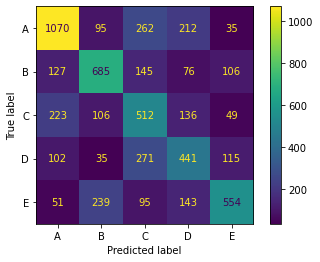

In [ ]:
plt.figure(figsize=(10,8))
plot_confusion_matrix(model, x_test, y_test)

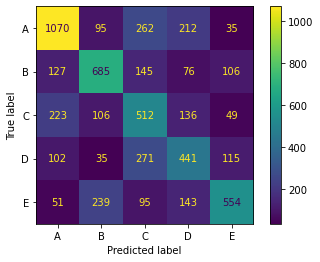

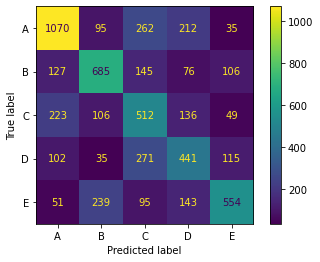

In [ ]:
## The warning says that the funcn plot_confusion_maxtirx will be discontinued in next verson and advising to use
## ConfusionMatrixDisplay from sklearn.metrics.
## let see how

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) ## As its from prediction, so it takes y_test and y_pred
                                                    ## as argument.

ConfusionMatrixDisplay.from_estimator(model, x_test , y_test) ## It takes same argumests are plot_confusion_marix

## Both gives the same result.

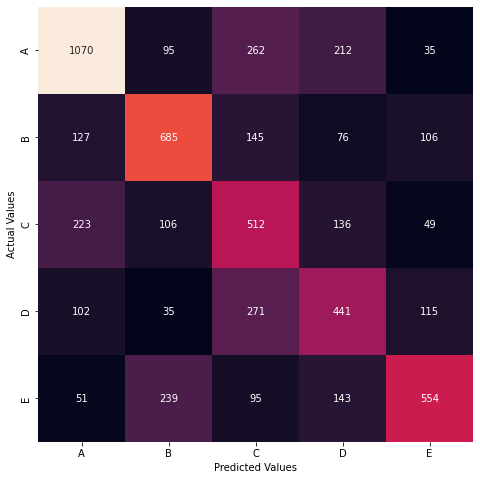

In [ ]:
plt.figure(figsize=(10,8))
name = y_test.unique()
sns.heatmap(mat, annot=True, square= True, fmt = 'd', cbar= False , xticklabels=name, yticklabels=name)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
## Observations :: Both shows about code line no. 24 and 26 are different ways of ploting the confusion matrix
## Here the diagonal values are True Predicted Values of each class and the other are false predictions
## 1070 ='A' ,685 ='B', 512 = 'C', 441 = 'D', 554 ='E'
## We can observe that there are more false predictios than the true prictions which should be less than 50.
## So confusion matrix in case of multi class doesn't give us that good pricture that makes us jump to
## another evalaution parameter i.e Classification Report.

In [ ]:
## Printing the precision and recall amoung other meterics using classification report.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.68      0.64      0.66      1674
           B       0.59      0.60      0.60      1139
           C       0.40      0.50      0.44      1026
           D       0.44      0.46      0.45       964
           E       0.64      0.51      0.57      1082

    accuracy                           0.55      5885
   macro avg       0.55      0.54      0.54      5885
weighted avg       0.57      0.55      0.56      5885



In [ ]:
## Here the calculation of precision, recall and f1-score is done bytaking each class +ve at a time and remaining as -ve
## for eg. to calculate the presison for class 'A', it values are consider as +ve and rest claseses
## i.e 'B', 'C' , 'D', 'E' are considerd as -ve.
## Similarly the calculation is done for each class
## To calculate the accuracy, we take all the diagonal elemenst which are the true pridictions, we add them up and
## divide it with toal no. of observations.
## Clearly from the report the model is doing a pathetic job here.
## Lets check the performance of the model for training dataset.

In [ ]:
y_pred_train = model.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           A       0.67      0.64      0.66      3906
           B       0.62      0.60      0.61      2658
           C       0.39      0.50      0.44      2396
           D       0.45      0.48      0.46      2252
           E       0.66      0.51      0.58      2525

    accuracy                           0.56     13737
   macro avg       0.56      0.55      0.55     13737
weighted avg       0.57      0.56      0.56     13737



In [ ]:
## So we can see the model is doing pathetic job in terms of training dataset alos. So it its underfittings.
## To handles underfitting :
## 1. We should increase the complexity of the model by adding more features. (not possible right now.)
## 2. Try another Models (Random Forest  or Decision Tree)
## 3. Use GridSearchCV() for hyper parameter tunning so find best fit for the model.

## Without changing the problem statment and without changing the different data try different models.
## So we need to do root cause analysis or the reason for error
## We are also taking Outliers in our data , we are not removing them . so this kind of anyasis should be done.
## Intent should be to less alter the data so that we can train the model on original data as much as possible.

### ALWAYS REMEMBER :: Once the model in its raw state gives you good results only then FINE TUNE it.

## Support Vector Machine ML Model

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [ ]:
# We will be using 'voice .csv' dataset

data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
data.shape

(3168, 21)

In [ ]:
## So this data is related to voice which has different parameters for a voice and the target variable is 'label' i.e
## if its a male voice or a female voice. Data has most of the numerial columns and non null values.

In [ ]:
data.label.unique()

array(['male', 'female'], dtype=object)

In [ ]:
## SO we have 2 classes in our target variable. 'male', 'female'.To check the frequecy of each class we use
## values_count()

data.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [ ]:
## Both are equal

### Feature Selection

In [ ]:
x = data.iloc[:,:-1] # data.drop('label', axis = 1)
y = data.iloc[:,-1:] # data.label

### Encoding

In [ ]:
## Since the target variable is non-numerical  so we will encode it
y = y.label.map({'male':1 , 'female':0})
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64


In [ ]:
## we can use , label encoder
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
# print(y)

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test  = train_test_split(x,y, train_size=0.8, random_state=5)

### Scaling

In [ ]:
## Scale the data between 1 and -1

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

### SVM with default Hyper Parameter

In [ ]:
## for SVM we will ve using the library sklearn.svm.SVC

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(random_state= 5) ## default kernal is rbs # Radial Baisc Function
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('SVM Accuracy : ', accuracy_score(y_test, y_pred))

SVM Accuracy :  0.9810725552050473


In [ ]:
## Without Hypertunning the modelis already giving the great accuracy.Let try to  find the default values of model

### Identify the default Values

In [ ]:
print('Default Values for C(Regularization Parameter is : ',svc.C)
print('Default Values for Kernal is : ',svc.kernel)
print('Default Values for Gamma is : ',svc.gamma)

Default Values for C(Regularization Parameter is :  1.0
Default Values for Kernal is :  rbf
Default Values for Gamma is :  scale


In [ ]:
## For Gamma >> Scale = 1/(No.of Features + Variance)
## The default values of C and Gamma are 1.0 and scale only for Kernal value ' rbf'.
## Alternatively you can get all the default values of all the paramerts using .get_params()

In [ ]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 5,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
## These are the default values of various hyper parameters in svc Model object

In [ ]:
## So there are multple paramaeters in the svc. for Hypertunning we will be focusing on only 3 i.e
## "C",'kernal', 'gamma'

## 'C' > Regulariszation Parameter. Higher the value higher is the accurracy its Float type.
## Default value is 1.0 We can try with higher values like , [1.0,10.0,100.0, 1000.0]

## 'gamma'> This value denotes gives info about the margin, lower the gamma value , higher is the margin and better
## is the classification between the classes.
## Default Values of gamma is 'scale'. i.e 1 divided by (no.of features + Variance)
## Other Values for gamma are : 'auto' or anyfloat value, 'auto' means 1 divide by no. of features

## 'Kernel'>> specify which function to use, its has values as {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
## default value of kernal is 'rbf'
## 'linear' >> mean an linear funct with 'degree' = 1
## 'rbf' >> means radial basic function with 'degree' = 2, like radius of circle , pie * r^2
## 'poly'>> any function withc has degree >2 , by default values of 'degree' = 3 eg , y= x^3
## 'sigmoid' >> its is a defined as 1 / (1+e^-x), add non linarlity to the model
## 'precomputed'>> customise function used by DS as per the convinience , rarely used.(prob in space)

## Addtionally , there is one parameter knoe as 'degree' which gets activated if we are using kernel as 'poly'
## by default it has the value 3.

### Optimizing Parameters using GridSeachCV() (Hypertunning)

In [ ]:
tune_dic = {'C': [0.1,1,10,100,1000],       ## High C gives High Accuracy
            'gamma' :[1,0.1,0.01,0.001,0.0001], ## Low gamme gives High Margin i.e better segregation between classes.
            'kernel' : ['linear','rbf','poly','sigmoid']}

from sklearn.model_selection import GridSearchCV

model_sv = GridSearchCV(svc, param_grid=tune_dic,cv=10, scoring= 'accuracy', verbose= True ,n_jobs= -1)
model_sv.fit(x_train, y_train)
print(model_sv.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
0.9802604960941148


In [ ]:
## .best_score_ >> is bydefault set to give 'f1-score'.We can set it according to our conviniece.

In [ ]:
## Check the best fit parameters

print(model_sv.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
## Lets reinstantiate all these best params to the model and evaluate the accuracy score.

model_at = SVC(gamma= 0.1, kernel= 'rbf',C =1)
model_at.fit(x_train,y_train)
y_pred_at = model_at.predict(x_test)
print('Accuracy after Tunning : ',accuracy_score(y_test,y_pred_at))

Accuracy after Tunning :  0.9842271293375394


In [ ]:
## SO Accuracy Increases from 98.10 to 98.42

In [ ]:
## in case the we decide to use the kernel as 'poly' we mention the 'degree' of polynomial that we want.

model_svc = SVC(kernel='poly', degree=3, C=0.99, gamma= 0.05, random_state =5)
model_svc.fit(x_train, y_train)
y_p = model_svc.predict(x_test)
print('Accuray : ',accuracy_score(y_test, y_p))

Accuray :  0.9589905362776026


In [ ]:
## So Accuracy reduced. So this is how we can funetune it.
## It requires lots of analysis which model to select which model will work more efficiently.
## Suppose if a data is has multicollinarity in it then we need to either handly it and then using the linear regression
## or switch to different model i.e Random forest or DT which are prone to multiplicolinearity.

## UnSupervised Machine Learning Model

### Hierarchical CLusterning (Agglomerative Clustering)

### Importing the libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## the dataset we will be using is 'shopping.csv'

customer_data = pd.read_csv('shopping_data.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
## So from the dataset , column 'Annucal Income' and 'Spending Score' are our X values
## and there is no Y(target variable)
## so lets filter it.
## filterring the coulmn

data = customer_data.iloc[:, 3:5]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
## Understand this is a way that we know the avg. income of the customer and spending score and based on that
## I am trying to create their cluster. Thats what I am trying to do here.

### Run Dendogram based on Hierarchical Clustering

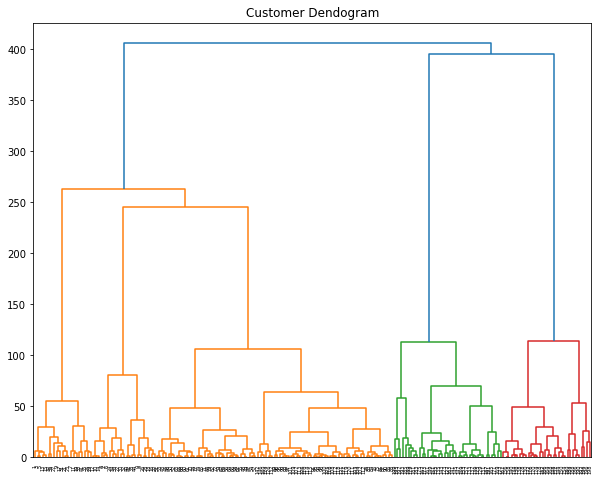

In [ ]:
## for ploting the dendogra we are going to using a new python library i.e scipy.cluster.hierarchy
## This hierarchy module consists of method to create the dendogram

from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(10,8))
plt.title('Customer Dendogram')
dend = dendrogram(linkage(data, method='ward'))

## This is the process of plotting the Dendogram , we use, dendogram() which takes linkage() as agrument
## which take dataset and method as it arugment. . method is basically the distance between the clusters.
## its 4 values , 'single' = minimun , 'complete' = maximum , 'average' , 'ward', by default value is 'ward'

### Predict the cluster for the observations

In [ ]:
##We will use the library sklearn.cluster.AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters= 5 ,metric= 'euclidean', linkage='ward')
x_pred = cluster.fit_predict(data)
x_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
## AgglomerativeClustering() takes 3 parametrs ,
## n_clusters = no. of clusters( we decide)
## metric = type of distance to compute the linkage , we can chooose between
## [“euclidean”, “l1”, “l2”, “manhattan”, “cosine”, “precomputed”] by default is 'euclidean'.
## 'linkage' = The linkage criterion determines which distance to use between sets of observation.
## The algorithm will merge the pairs of cluster that minimize this criterion. its has following values
## linkage = {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
## ‘ward’ minimizes the variance of the clusters being merged.
# ‘average’ uses the average of the distances of each observation of the two sets.
# ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
# ‘single’ uses the minimum of the distances between all observations of the two sets.

## Also since its unsupervised ML model we donot have Y, so that is why we use fit_predict simultanously. using
## .fit_predict() so we have given the lable to the existing dataset.

## Alternatively we can do it in 2 steps also. like cluster.fit(data) then cluster.predict(data)

### Plot the Clusters

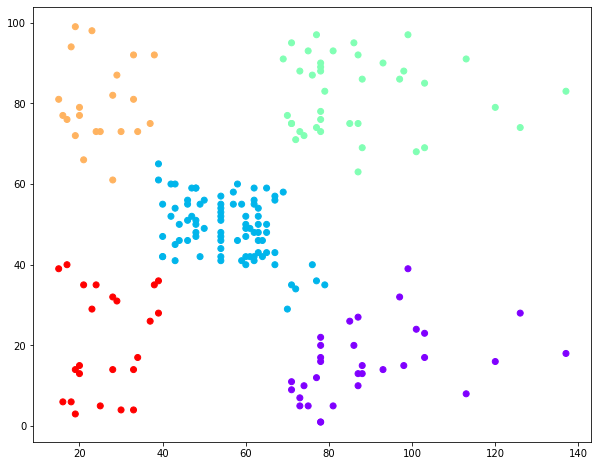

In [ ]:
## So far we have given the labels to the dataset and divide them into cluster. how do we know if the model has
## done the good job or not. is by visualising the plot using scatter plot

plt.figure(figsize=(10,8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],  c=x_pred , cmap = 'rainbow')

## c = array-like or list of colors or color, Marker Color, default =None
## Alternatively,we use c = cluster.labels_  to get the x_pred , cluster_labels will give the same output as x_pred

In [ ]:
## Its shows the model is doing good job.
## We can try for diff values of n_clusters

### n_clusters = 6

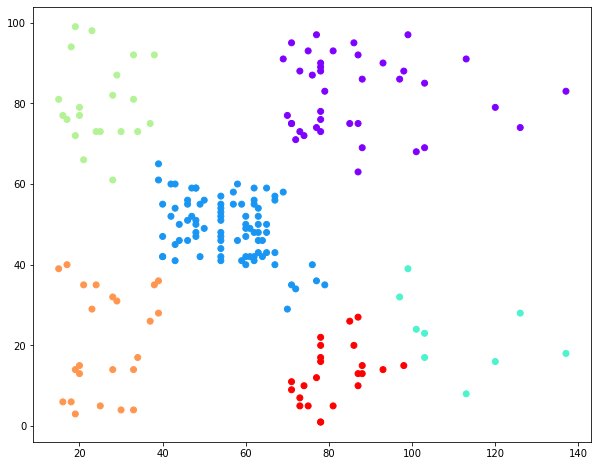

In [ ]:
cluster_6 = AgglomerativeClustering(n_clusters= 6 ,metric= 'euclidean', linkage='ward')
x_pred_6 = cluster_6.fit_predict(data)
plt.figure(figsize=(10,8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],  c=x_pred_6 , cmap = 'rainbow')

### n_clusters = 3

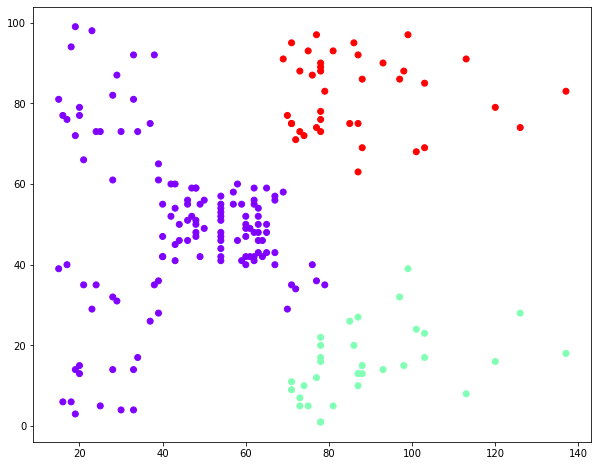

In [ ]:
cluster_3 = AgglomerativeClustering(n_clusters= 3 ,metric= 'euclidean', linkage='ward')
x_pred_3 = cluster_3.fit_predict(data)
plt.figure(figsize=(10,8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],  c=x_pred_3 , cmap = 'rainbow')

In [ ]:
## Similarly We can play around with this and with different cluster vlus and model is doing fine job with 3,6 also.

## Like the Supervised Model we donot have any evaluation matrix to evaluate the accuracy of the model the only way
## to evalute the model performance is by visualising the plot i.e how better the segregation is done.

## Non Hierarchical Clustering

## K Mean Clustering

### importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## We will be using the dataset name  cust_spend_data.csv for this model

## Importing the dataset

dataset = pd.read_csv('Cust_Spend_Data.csv')
dataset.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [ ]:
dataset.shape

(10, 7)

In [ ]:
## Since Cust_ID is a unique column and is of no use to use, we can drop it.
## 'Name' is a unqiue features , we are keeping it as it will help us later onto categories the data.

In [ ]:
df = dataset.drop('Cust_ID', axis =1)
df.head()

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,A,10000,2,1,1,0
1,B,7000,3,0,10,9
2,C,7000,7,1,3,4
3,D,6500,5,1,1,4
4,E,6000,6,0,12,3


### Feature Scaling

In [ ]:
## All the features except Name are numerical and we are working on distance based model so feature scaling
## is required. We should have done it in hierarchical model also its not done so we can try to do it and check.

## This is really importance that we follow the basics and donot blindly follows someone's approach.
## Use your own brain and calibrate which measure needs to be applied.

## Now a good part about the model is is that its an unsupevised model so we donot need to worry about
## train_test split so feature scaling can be done on entire dataset except the 'Name'column.

## We will exclude the 'Name' and 'Avg_Month_Spend' from the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

data = df.iloc[:, 2:6]
dss = StandardScaler()
data_std = dss.fit_transform(data)
data_std

array([[-1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [-0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [ 0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [ 0.        , -0.65465367, -0.74143264,  1.03509834]])

### WSS Plot or Elbow Plot for Optimal No. of Cluster Identification

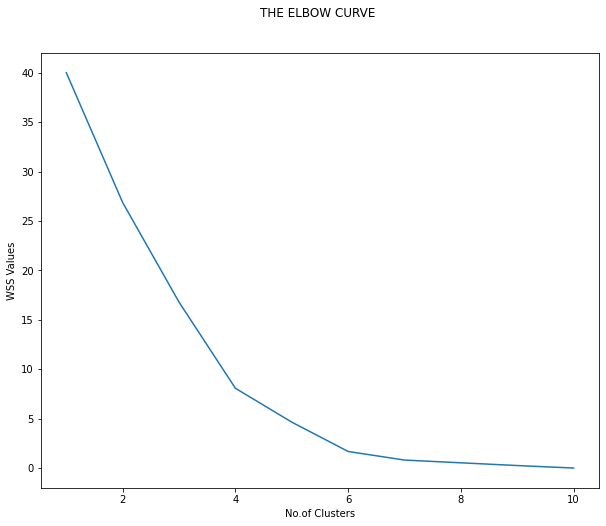

In [ ]:
## To give a brief, the optimum value of k i.e no. of cluster to need to decide for better performance of the model
## can be calcuated using Elbow curve. which is a graph between
## WWS (Within Sum of Square i.e Max Distance betweeen  2 extreme pointswith in cluster) Vs No.of Clusters
## So Its is observed that the initially for the lowest value of the No. of Clusters like 1, WSS is Max
## As the value of no.of clusters increases the WSS keep on reducting upto a certain point
## the deduction becomes less. That point is called Elbow point.
## The aim is to plot the WSS or Elbow Curve so that we can find the optimum value of k and use it to build
## a model which performs better.
## For this we will be using sklearn.cluster.KMeans and for loop to calcualte the differnt WSS values of diff.
## values of k(no. of clusters) and then store those values in a list and polt the elbow curve.
## The initial value of No. of clusters (to start with) will be given by us we can start with 1 or any values
## and later on loop will follow.


from sklearn.cluster import KMeans

wss = []

for i in range(1,11): ## Starting with No.of Clusters = 1 upto 10
    kmean = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmean.fit(data_std)
    wss.append(kmean.inertia_)

## 'init=' is the method we choose to initiatlization, has 2 values {‘k-means++’, ‘random’} ,default=’k-means++’
## kmean_inertia_ >> gives the value of WSS for each value of n_clusters which we are storing in wss

### lets plot the Elbow Curve

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wss)
plt.title('THE ELBOW CURVE \n\n')
plt.xlabel('No.of Clusters')
plt.ylabel('WSS Values')
plt.show()

In [ ]:
## Here We observe that there are 2 curves where the value become stable , n_clusters = 4 and at n_clusters = 6
## Sp we can try for value like 4,5,6 to intiatize the model with these k values.

## Let see How

### K-Mean Clustering and Cluster Information

In [ ]:
## Fitting K-Mean to the dataset.

kmeans = KMeans(n_clusters=4 , random_state=42)
y_kmeans = kmeans.fit_predict(data_std)
print(type(y_kmeans))

## Adding the value of y_kmeans as a new feature to our dataset

df['Cluster'] = y_kmeans # Adding New Feature
df ## checking the result

<class 'numpy.ndarray'>


,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
0,A,10000,2,1,1,0,1
1,B,7000,3,0,10,9,3
2,C,7000,7,1,3,4,2
3,D,6500,5,1,1,4,2
4,E,6000,6,0,12,3,0
5,F,4000,3,0,1,8,3
6,G,2500,5,0,11,2,0
7,H,2500,3,0,1,1,1
8,I,2000,2,0,2,2,1
9,J,1000,4,0,1,7,3


In [ ]:
## Grouping the entire data on the basis of mean value of each cluster to understand the result better

New_df = pd.DataFrame(round(df.groupby('Cluster').mean(),1))
New_df
## round() is used to roundoff the values upto 1 decimal pleace
## round(10.334422,3) >> 10.334

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Cluster,,,,,
0,4250.0,5.5,0.0,11.5,2.5
1,4833.3,2.3,0.3,1.3,1.0
2,6750.0,6.0,1.0,2.0,4.0
3,4000.0,3.3,0.0,4.0,8.0


In [ ]:
## So we can observe that cluster '0' has Ave Monhtly spendupto 4250, '1' = 4833.3 ,'2' = 6750 ,'3' = 4000
## Similarly its has different visits
## No if someone comes and tell that they donot need 4 visit they only need 3 visits , which groups are we going to merge?
## 0 and 2  as they are much closer to eachother 5.5 and 6.0
## lets try with n_cluster = 3

In [ ]:
kmeans = KMeans(n_clusters=3 , random_state=42)
y_kmeans = kmeans.fit_predict(data_std)

## Adding the value of y_kmeans as a new feature to our dataset

df['Cluster'] = y_kmeans # Adding New Feature
df ## checking the result

kmeans = KMeans(n_clusters=4 , random_state=42)
y_kmeans = kmeans.fit_predict(data_std)
print(type(y_kmeans))

New_df = pd.DataFrame(round(df.groupby('Cluster').mean(),1))
New_df

<class 'numpy.ndarray'>


,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Cluster,,,,,
0,7833.3,4.7,1.0,1.7,2.7
1,4250.0,5.5,0.0,11.5,2.5
2,3300.0,3.0,0.0,3.0,5.4


In [ ]:
## No if we see since we have reduced the no. of cluster the difference gets increase. People who spend higher
## comes under group 1st then lowest spend people comes under last. So when we reduce the cluster the difference
## has been more clear within the cluster and between those cluster there are more similar features.

In [ ]:
## Observing each cluster

## cluster '0'
##
clu_0 = df[df.Cluster==0]
clu_0

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
0,A,10000,2,1,1,0,0
2,C,7000,7,1,3,4,0
3,D,6500,5,1,1,4,0


In [ ]:
clu_0.shape

(3, 7)

In [ ]:
## cluster '1'

clu_1 = df[df.Cluster==1]
clu_1

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
4,E,6000,6,0,12,3,1
6,G,2500,5,0,11,2,1


In [ ]:
clu_1.shape

(2, 7)

In [ ]:
## cluster '2'

clu_2 = df[df.Cluster == 2]
clu_2

,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
1,B,7000,3,0,10,9,2
5,F,4000,3,0,1,8,2
7,H,2500,3,0,1,1,2
8,I,2000,2,0,2,2,2
9,J,1000,4,0,1,7,2


In [ ]:
clu_2.shape

(5, 7)

In [ ]:
## Observation : Most of the people lies in cluster '2' with Ave Spen_lint of 1000-7000, No of visits are almost similar
## like this we interprets the data.
## We cannot plot it because its in mulitple dimention as we have 7 active features so 7-D
## So in case of multi dimesnion, we will analysis each cluster manually
## Q. Are there any tools and techniques to measure the clustering?
## Ans.There are different tools and different techniques but there is NO standard approach. This approach is best.


## Remember : These are NOT only Clustering methods, there are different methods of clustering apart from Agglomerative and K-Mean,  We need to research about it and design the CV according to the job requirement only.

## Principal Component Analysis (PCA)

### Implenting PCA

In [ ]:
## We will import the standard libraries and for PCA we will be using sklearn.decomposition provides the PCA object
## which can simply fit and transform the data info Principal compoenent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [ ]:
## For PCA we will be using gthe famouse image dataset i.e 'mnist.csv'

df = pd.read_csv('mnist_012.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(3147, 785)

In [ ]:
## This is how image data looks like with higher no. of columns her we have 785 columns that means its 785-Dimension
## In the dataset the first column i.e 0 is the target variable that has been encodedlike  0,1,2 (given in Description)
## We will not do train_test split as its a unsupervised ML model however we will split the data in x and y

x = df.drop('0', axis=1)
y = df['0']


## So it seems to be supervised data however it has so many features first we need reduce the no. of features.
## That means in supervised ML model also could large no. of features., we can keep the target variable aside
## and work on X to reduce the no. of features.

In [ ]:
x

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## So we will exclude the target variable Y and work exclusviely on X that will make it Unsupervised.
## So this the approach that we can use before applying to any supervised ML algo just to handle the dimensional
## curse or just to handle the problem of higher dimension.
## PCA is the technique used before applying any model.It is not a model that is helping us to forcast anything
## but a technique used to reduce the dimension so that with the reduced dimension dataset you can go ahead
## and create the model.

### This datset has 784 coulmns as an explanatory variales and one Y variable name '0' which tells what digit does row represents.

### We wont be using  Y while creating the principal components because we dont want PCA algo to know which class(digit) a particular row belongs to.

### APPLYING PCA

In [ ]:
pca = PCA(n_components=100)

## Initially we dedcide to work with default parameters and 100 components.

df_pca = pca.fit_transform(x) ## in Unsupervised ML model fit and transform happens in single step.

print(df_pca) ## checking the output


print(df_pca.shape)  ## checking the shape

[[ -134.2724107    107.74010177  -544.92340877 ...   -14.79599536
     31.64755649   -69.88184788]
 [ -970.41512047  -371.81582235   114.48075403 ...    -1.64422968
    -16.14549492     3.09475237]
 [ 1267.52970321  -263.23020732   -35.68693404 ...   112.4235864
    -52.12669305    76.38805481]
 ...
 [ 1467.86804662  -268.85955195   635.24088951 ...  -190.39814975
     24.88139965   -83.68979795]
 [-1070.02927943  -119.69307826   180.78825679 ...    -6.55702424
      3.38493246   -31.67657169]
 [  117.6542393   1291.7904274   -753.06136728 ...   -45.0414408
     11.33965162    28.98037394]]
(3147, 100)


In [ ]:
## Clearly the data has 100 coulmns now and it looks not understandable,so lets make it more clearer by convering
##it into dataframe and rounding off the values upto 2 decimal place using .round()

df_pca = pd.DataFrame(df_pca.round(2))
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,...,73.75,-91.73,89.39,0.93,13.07,-10.54,-63.80,-14.80,31.65,-69.88
1,-970.42,-371.82,114.48,-339.01,-53.98,-106.12,19.83,-443.88,-220.42,69.63,...,-75.05,-10.14,107.33,8.28,45.22,-49.66,-22.52,-1.64,-16.15,3.09
2,1267.53,-263.23,-35.69,612.76,-734.47,267.74,363.05,-130.85,-160.31,-353.75,...,-20.07,-38.71,56.95,-46.34,-43.46,41.71,17.57,112.42,-52.13,76.39
3,-1066.12,-239.33,137.99,-424.37,-174.55,209.85,57.16,-316.86,-325.03,148.86,...,19.16,22.46,-42.19,-25.52,0.86,8.95,-3.20,-9.72,-3.35,28.36
4,1037.18,-427.39,-700.74,-566.28,134.67,-584.41,-546.83,-70.67,52.58,306.40,...,-72.97,-10.22,2.82,2.02,55.15,24.61,-11.21,9.76,-8.90,-5.72


In [ ]:
## So it looks better than before however we still donot understand the data and donot know if the principle components
## are doing good job or not.
##  For this we will move to the analysing part.

### Analysis of PCA

In [ ]:
## So If we looking in to data set 'df_pca' the first column '0' is our first principal component, the second column
## '1' is our second principal component and so on that is how we read it upto column '99' which is our 100th
## principal component as we decide to keep 100 principal components.

## So principal components captures the information of the dataset in the form of VARIANCE.
## First Components has the highest variance and gives the highest info about the dataset and as the
## components increases the variance keeps on reducing so the column '99' has the lowest variance
## The variance of the given dataset can be checked using .explained_varinace_ function.

## Lets see how

v = pca.explained_variance_ ## Variance associated with each PC is obtained
print(v)

[764074.70509694 333409.88084323 206248.30545139 190073.11430869
 149373.67054257 140893.79592355 103478.87643359  87549.48702637
  82347.51266607  66776.33611636  56734.88041817  50888.10842031
  48723.43475235  44766.34864866  42979.74063698  39220.4391615
  34644.27201153  33867.28940259  31499.70087361  29871.85610563
  27799.10313559  27094.40784534  25070.70731111  24148.77039496
  22922.38294874  22438.22954621  21647.88929942  19562.71204374
  17864.20454517  17535.62959766  16732.17819736  15998.44801033
  15709.97749117  14589.5337499   14294.23681422  13738.41038493
  12966.46363847  12211.69430674  11518.9423254   11300.47985218
  10640.4493199   10370.3713912   10198.6772293    9919.57888863
   9815.1357988    9249.11334779   9174.51128123   8865.2738645
   8529.54076229   8433.70764312   8091.29262767   7625.21602542
   7513.05710872   7144.22474549   7069.30152895   6908.32084104
   6841.20458009   6609.17296685   6278.12613754   6218.85344402
   5853.65243984   5746.677

In [ ]:
## Clearly  is it giving 100 different values of each principal component which is again not understandable
## Since we donot have any refernce to compare so an alternative to that would be if we get the proportion of
## information given by each PC that  would be more understandable that can be achieved using the function
## explained_variance_ratio

print(pca.explained_variance_ratio_.round(4)) ## rounding upto 4 decimal places

[0.2226 0.0971 0.0601 0.0554 0.0435 0.041  0.0301 0.0255 0.024  0.0195
 0.0165 0.0148 0.0142 0.013  0.0125 0.0114 0.0101 0.0099 0.0092 0.0087
 0.0081 0.0079 0.0073 0.007  0.0067 0.0065 0.0063 0.0057 0.0052 0.0051
 0.0049 0.0047 0.0046 0.0043 0.0042 0.004  0.0038 0.0036 0.0034 0.0033
 0.0031 0.003  0.003  0.0029 0.0029 0.0027 0.0027 0.0026 0.0025 0.0025
 0.0024 0.0022 0.0022 0.0021 0.0021 0.002  0.002  0.0019 0.0018 0.0018
 0.0017 0.0017 0.0016 0.0016 0.0016 0.0015 0.0015 0.0014 0.0014 0.0013
 0.0013 0.0013 0.0013 0.0012 0.0012 0.0012 0.0011 0.0011 0.0011 0.0011
 0.0011 0.001  0.001  0.001  0.001  0.001  0.0009 0.0009 0.0009 0.0009
 0.0009 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0007 0.0007 0.0007]


In [ ]:
## Clearly In descending order we can see the 1st PC explains  22.3% of the variance in the entire dataset
## 2nd PC explains 9.7% of the variance in the entire dataset. and so on.
## One more thing to observe is that towards the end the PC explaint only 0.07 to 0.09 % of variance in the entire
## dataset which means we can further reduce the dimentionality of the dataset by reducing the PC to less than 100.

In [ ]:
## We as a DS need to analyse it further unless and untill we donot visualize it by ploting the graph
## it doesn't gives the clear picture.
## Lets try something to understand the PC in more details

## Going into depth and ploting Scree Plot

### Getting better picture using Cumulative Variance

In [ ]:
## We will create a new dataframe with Variace , Variance ratio and the cumulative variances of each PC
## to obseve the output more clearlv.
## To calculate the cumulative variance we will be using np.sumcum()

var = pca.explained_variance_.round(2) ## getting the variance of each PC

var_ratio = pca.explained_variance_ratio_.round(4)*100 # Getting the Variance Ratio of Each PC and coverting into
                                                # perentage by * with 100  and rounding upto 4 decimal place

cum_var = np.cumsum(var_ratio) ## to calculate the cumulative variance

a = [np.arange(1,101), var , var_ratio , cum_var] # Store as an array to pass into Dataframe

new_df = pd.DataFrame(a , index=['PC#', 'Variance', 'Variance _Ration(%)', 'Cumulative_Variance(%)'])
new_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
PC#,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,91.00,92.00,93.00,94.00,95.00,96.00,97.00,98.00,99.00,100.00
Variance,764074.71,333409.88,206248.31,190073.11,149373.67,140893.80,103478.88,87549.49,82347.51,66776.34,...,2940.13,2873.86,2803.93,2699.94,2691.39,2621.36,2593.55,2439.14,2377.84,2354.33
Variance _Ration(%),22.26,9.71,6.01,5.54,4.35,4.10,3.01,2.55,2.40,1.95,...,0.09,0.08,0.08,0.08,0.08,0.08,0.08,0.07,0.07,0.07
Cumulative_Variance(%),22.26,31.97,37.98,43.52,47.87,51.97,54.98,57.53,59.93,61.88,...,93.19,93.27,93.35,93.43,93.51,93.59,93.67,93.74,93.81,93.88


In [ ]:
## So clearly We can observe the values of each PC however info we will be more clear if we transpose it
## i.e changin the rows and column , using .T() function from pandas library

final_df = new_df.T
final_df


,PC#,Variance,Variance _Ration(%),Cumulative_Variance(%)
0,1.0,764074.71,22.26,22.26
1,2.0,333409.88,9.71,31.97
2,3.0,206248.31,6.01,37.98
3,4.0,190073.11,5.54,43.52
4,5.0,149373.67,4.35,47.87
...,...,...,...,...
95,96.0,2621.36,0.08,93.59
96,97.0,2593.55,0.08,93.67
97,98.0,2439.14,0.07,93.74
98,99.0,2377.84,0.07,93.81


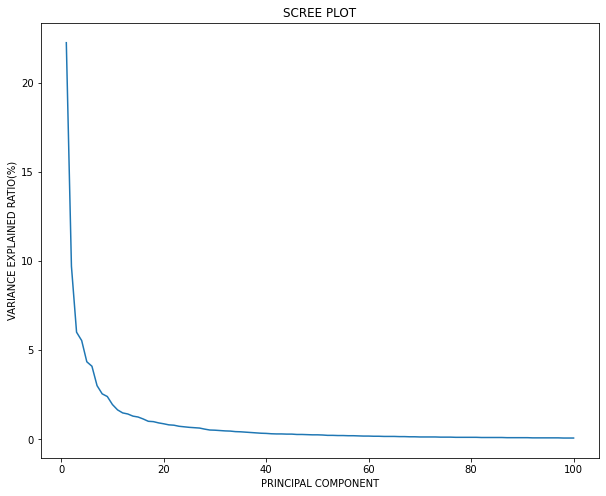

In [ ]:
## Here we can observe that the cumulative variance of the first 5 PC is 47.87% similary we can check upto 95th PC
## the cumumlative variance is given by all the 95 PC is 93.59% and aftet this is is no significant increase in the
## percentage. So like this we can plot this data in excel and see from where did this unifotmity starts
## or we can use see it visisually by by plot Scree Plot
## Lets See how.

## SO for this we we will plot a graph between No. of PC Vs Variance_Explained_Ratio

plt.figure(figsize=(10,8))
plt.plot(range(1,101), var_ratio)
plt.title('SCREE PLOT')
plt.xlabel('PRINCIPAL COMPONENT')
plt.ylabel('VARIANCE EXPLAINED RATIO(%)')
plt.show()

In [ ]:
## So as we can see after PC # 25 it become stablise So this is how we can check the optimum values of PC that should need
## by creating a tradeoff between no. of principal components and total informatio provide by each component.

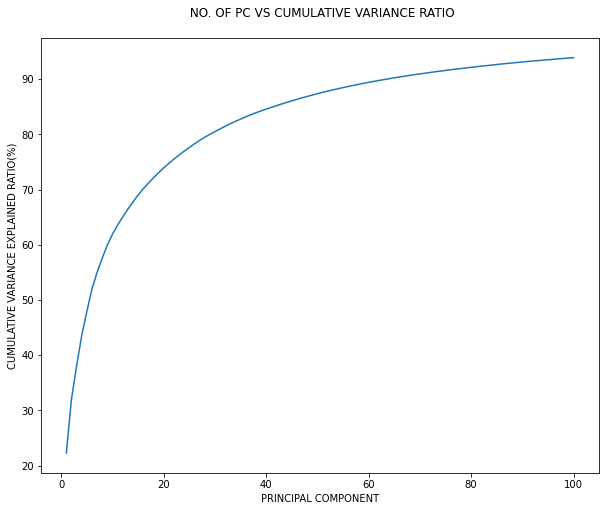

In [ ]:
## Some people use cumulative variance for anaylysis
plt.figure(figsize=(10,8))
plt.plot(range(1,101),cum_var)
plt.title(' NO. OF PC VS CUMULATIVE VARIANCE RATIO\n')
plt.xlabel('PRINCIPAL COMPONENT')
plt.ylabel('CUMULATIVE VARIANCE EXPLAINED RATIO(%)')
plt.show()

In [ ]:
## This is opposite to Scree Plot as with every increase in PC the informatiom gets increase.

In [ ]:
### Lets Use this technique with 50 PC

pca1 = PCA(n_components=50)
df_pca1 = pca1.fit_transform(x)
var_1 = pca1.explained_variance_.round(4)
var_ratio_1 = pca1.explained_variance_ratio_.round(4)*100
cum_var_1 = np.cumsum(var_ratio_1)
a1 = [range(1,51), var_1, var_ratio_1 , cum_var_1]
new_df_1 = pd.DataFrame(a1, index=['PC#', 'Variance', 'Variance _Ration(%)', 'Cumulative_Variance(%)']).T
new_df_1

,PC#,Variance,Variance _Ration(%),Cumulative_Variance(%)
0,1.0,764074.7051,22.26,22.26
1,2.0,333409.8808,9.71,31.97
2,3.0,206248.3055,6.01,37.98
3,4.0,190073.1143,5.54,43.52
4,5.0,149373.6705,4.35,47.87
5,6.0,140893.7959,4.10,51.97
6,7.0,103478.8764,3.01,54.98
7,8.0,87549.4870,2.55,57.53
8,9.0,82347.5127,2.40,59.93
9,10.0,66776.3361,1.95,61.88


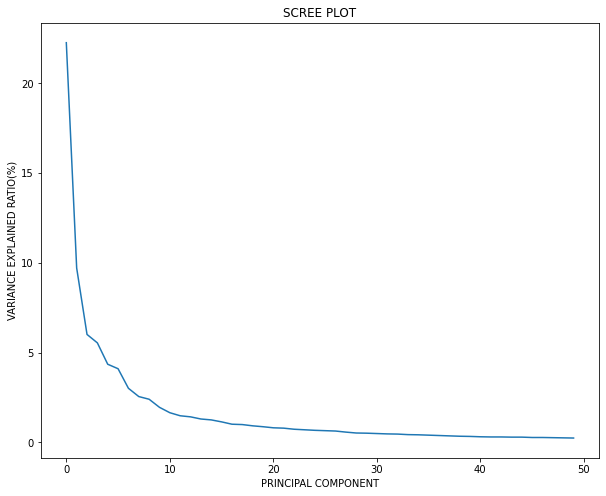

In [ ]:
## So Cumulative Variance keeps on increasing as No. of component increases.

plt.figure(figsize=(10,8))
plt.plot(range(50),var_ratio_1)
plt.title('SCREE PLOT')
plt.xlabel('PRINCIPAL COMPONENT')
plt.ylabel('VARIANCE EXPLAINED RATIO(%)')
plt.show()

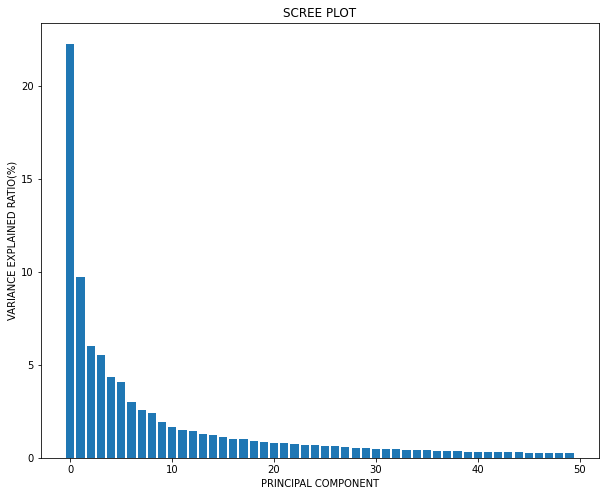

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(range(50),var_ratio_1)
plt.title('SCREE PLOT')
plt.xlabel('PRINCIPAL COMPONENT')
plt.ylabel('VARIANCE EXPLAINED RATIO(%)')
plt.show()

### No. fo PC Vs Cumulative Variance

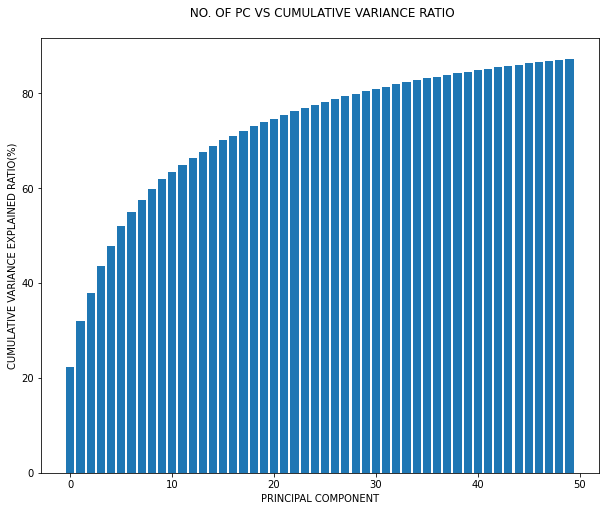

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(range(50),cum_var_1)
plt.title(' NO. OF PC VS CUMULATIVE VARIANCE RATIO\n')
plt.xlabel('PRINCIPAL COMPONENT')
plt.ylabel('CUMULATIVE VARIANCE EXPLAINED RATIO(%)')
plt.show()

In [ ]:
## THe curve increases as we move futher as with every increase it gives more info and after a certain point of time it becomes stagnant.
## So its again boils down to subjective call upto how many PC you need in your model.
## Remember higher the no. of feature higher time it will take to execute and higher the production cost.

### Now Once you get your PC goahead and add your output variable to it and now your new dataset is ready to apply any supervised algorithm.

In [ ]:
df_pca1 = pd.DataFrame(df_pca1.round(2))
df_pca1['Y'] = y
df_pca1

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Y
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,...,-23.29,15.98,-176.83,152.39,18.12,-7.19,124.04,-9.42,124.69,2
1,-970.42,-371.82,114.48,-339.01,-53.98,-106.12,19.83,-443.88,-220.42,69.63,...,-68.35,-75.37,-20.80,5.55,-52.16,8.92,-9.91,-42.82,28.13,1
2,1267.53,-263.23,-35.69,612.76,-734.47,267.74,363.05,-130.85,-160.31,-353.75,...,-84.07,79.76,12.44,-11.68,15.70,71.47,-28.53,-162.09,106.91,0
3,-1066.12,-239.33,137.99,-424.37,-174.55,209.85,57.16,-316.86,-325.03,148.86,...,-65.01,5.09,42.95,44.00,44.76,-9.30,-93.79,-50.64,-18.85,1
4,1037.18,-427.39,-700.74,-566.28,134.67,-584.41,-546.83,-70.67,52.58,306.40,...,133.86,152.94,-8.09,-22.02,-161.83,17.93,52.56,5.03,21.47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,-1018.21,-466.25,28.87,230.82,-86.81,381.40,-161.22,-116.84,-362.09,197.67,...,79.04,-21.64,26.58,32.84,69.69,-49.74,21.52,-85.71,23.86,1
3143,-31.91,532.99,-725.47,99.34,-203.10,275.15,-263.03,381.75,-995.48,-504.89,...,-81.38,28.49,-172.65,-153.73,78.75,15.10,-39.42,87.38,51.56,2
3144,1467.87,-268.86,635.24,-466.37,-162.05,1172.37,-91.88,437.26,644.77,164.70,...,87.98,39.15,-89.76,-128.56,-49.64,-85.95,-23.51,-78.73,75.34,0
3145,-1070.03,-119.69,180.79,-271.00,-213.40,409.35,-138.32,-249.78,-284.35,214.29,...,33.91,-81.52,-53.98,39.38,-53.31,-62.32,68.73,51.68,22.65,1


## PCA is a technique which we generally apply after preprocessing the data.

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])


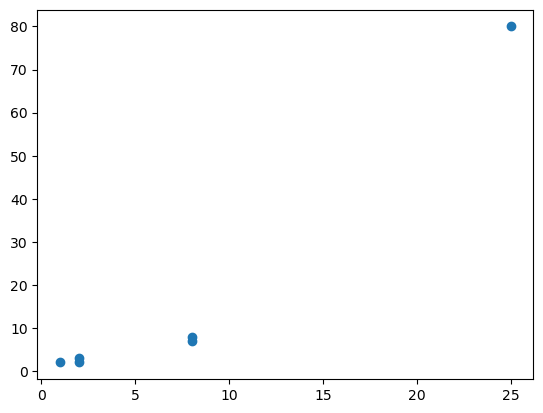

In [ ]:
# Visualising the data

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
##  DSCAN assign -1 to noise points, model_obj.labels_ is the function that will gives us all result about the cluster.

db = DBSCAN(eps=3, min_samples=2)

db.fit(X)
db.labels_ # Alternatively we can use, y_pred = db.fit_predict(X)

array([ 0,  0,  0,  1,  1, -1])

In [ ]:
# Here 3 points are assigned to 0 cluster, 2 point areassinged to cluster 1 and 1 point as noise point with value -1.
# Now if we incncrease the epi to 10, then all will be 1 cluster and 1 will be noise poiont.

In [ ]:
db = DBSCAN(eps=10, min_samples=2)

db.fit(X)
db.labels_

array([ 0,  0,  0,  0,  0, -1])

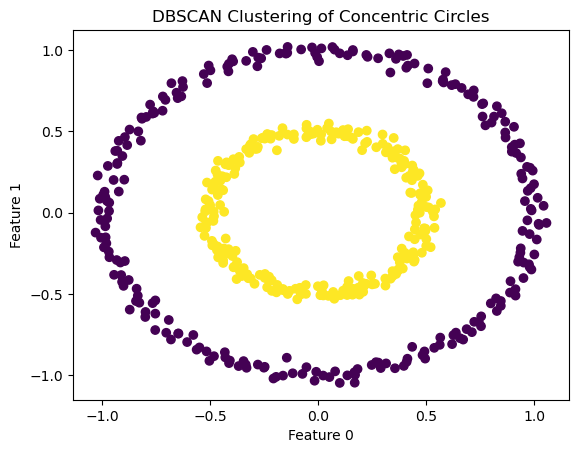

In [ ]:
## Checking the result of DBSCAN on concentric circle where Kmean fails.

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# Create a concentric circle dataset
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


### So we can see that DBSCAN words very well on concentric circle dataset where Kmean fails